In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib.colors import LogNorm
from scipy.integrate import simps
from time import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact

In [3]:
from matplotlib.colors import LogNorm, SymLogNorm

In [4]:
from scipy.optimize import minimize
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d


In [5]:
data = pd.read_csv('The_Tax_Burden_on_Tobacco__1970-2017.csv')


In [6]:
# states = data['LocationDesc'].unique()
statesid = data['LocationAbbr'].unique()
sskip = ['CA', 'MA', 'AZ', 'OR', 'FL', 'AL', "HI", 'MD', 'MI','NJ', 'NY', 'WA', 'DC']

ils, sil = {}, {}
for i in range(len(statesid)):
    ils[i] = statesid[i]
    sil[statesid[i]] = i
    

In [7]:
data['SubMeasureDesc'].unique();

In [8]:
sales = data[data['SubMeasureDesc'] == 'Cigarette Consumption (Pack Sales Per Capita)']
costs = data[data['SubMeasureDesc'] == 'Average Cost per pack ']

# Setup

In [9]:
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')

nyears = years.size
i1 = 18
yearspred =  years[i1:]
yy = years.size


In [10]:
statesales = {}
statecosts = {}
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')
    statesales[s] = sales[loc]['Data_Value'].values.astype('float32')
    loc = costs['LocationAbbr'] == s
    statecosts[s] = costs[loc]['Data_Value'].values.astype('float32')
# ss = 'CO'
# tmp = statesales['CA'].copy()
# statesales['CA'] = statesales[ss].copy()
# statesales[ss] = tmp.copy()

salearray = np.zeros((len(ils), years.size))
for i in range(len(statesid)):
    salearray[i] = statesales[ils[i]]
    
costarray = np.zeros((len(ils), years.size))
for i in range(len(statesid)):
    costarray[i] = statecosts[ils[i]]
    
# salearrayca = []
# for i in range(len(statesid)):
#     if ils[i] == 'CA': continue
#     else: salearrayca.append(statesales[ils[i]])
# salearrayca = np.array(salearrayca)

salearrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: salearrayskip.append(statesales[ils[i]])
salearrayskip = np.array(salearrayskip)
salearrayca = salearrayskip

# costarrayca = []
# for i in range(len(statesid)):
#     if ils[i] == 'CA': continue
#     else: costarrayca.append(statecosts[ils[i]])
# costarrayca = np.array(costarrayca)
costarrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: costarrayskip.append(statecosts[ils[i]])
costarrayskip = np.array(costarrayskip)
costarrayca = costarrayskip

casales = statesales['CA']
meansales = salearrayca.mean(axis=0)
meansalesskip = salearrayskip.mean(axis=0)
meansalesca = meansalesskip

cacosts = statecosts['CA']
meancosts = costarrayca.mean(axis=0)
meancostsskip = costarrayskip.mean(axis=0)


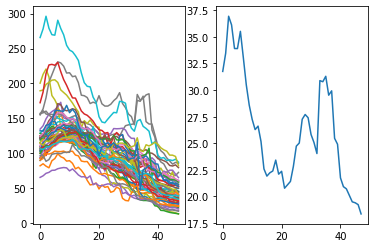

In [11]:
plt.subplot(121)
plt.plot(salearray.T)
plt.subplot(122)
plt.plot(salearray.std(axis=0))


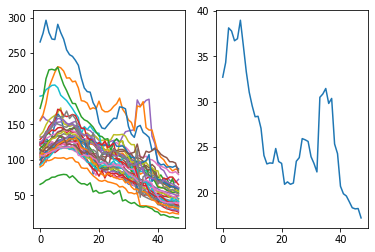

In [12]:
plt.subplot(121)
plt.plot(salearrayskip.T)
plt.subplot(122)
plt.plot(salearrayskip.std(axis=0))


In [13]:
statepinc = {}
for iid in statesid:
    with open('./personal_income/%s.txt'%iid) as f:
        inc = []
        iyears = []
        for line in f.readlines()[1:]:
            iyears.append(float(line.split(',')[0].split('-')[0]))
            inc.append(float(line.split(',')[1]))
        ind = np.where(np.array(iyears)==1970)[0][0]
        statepinc[iid] = np.array(inc[ind:])
        
pincarray = np.zeros((len(ils), years.size))
for i in range(len(statesid)):
    pincarray[i] = statepinc[ils[i]]

pincarrayca = []
for i in range(len(statesid)):
    if ils[i] == 'CA': continue
    else: pincarrayca.append(statepinc[ils[i]])
pincarrayca = np.array(pincarrayca)

pincarrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: pincarrayskip.append(statepinc[ils[i]])
pincarrayskip = np.array(pincarrayskip)
pincarrayca = pincarrayskip


capinc = statepinc['CA']
meanpinc = pincarray.mean(axis=0)
meanpincskip = pincarrayskip.mean(axis=0)

In [14]:

synthstates = np.array(['CO', 'CT', 'MO', 'NV', 'UT'])

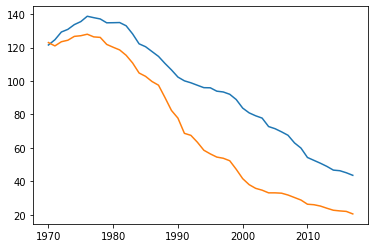

In [15]:
plt.plot(years, salearray.mean(axis=0))
plt.plot(years, statesales['CA'])

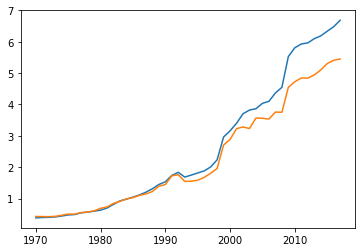

In [16]:
plt.plot(years, costarray.mean(axis=0))
plt.plot(years, statecosts['AL'])

In [17]:
# d1 = statesales['CA']
# d2 = (np.pad(d1, (d1.size//2, d1.size//2), mode='constant', constant_values=0))
# # d2 = (np.pad(d1, (d1.size, d1.size), mode='constant', constant_values=0))

# f1, f2 = np.abs(np.fft.rfft(d1))**2, np.abs(np.fft.rfft(d2))**2
# n1 = np.fft.rfftfreq(d1.size)
# n2 = np.fft.rfftfreq(d2.size)

# plt.plot(n1, f1)
# plt.plot(n2, f2)
# plt.yscale('log')
# plt.show()
# plt.plot(n2, np.interp(n2, n1, f1)/f2)


In [18]:
## ff = np.fft.rfftfreq(casales[:].size)

# # pca = np.fft.rfft(casales-casales.mean())
# pca = np.fft.rfft(casales[:], norm='ortho')
# plt.plot(ff, abs(pca)**2)

# # pall = np.fft.rfft(salearray.mean(axis=1) - salearray.mean())
# pall = np.fft.rfft(salearray[:].mean(axis=1), norm='ortho')
# plt.plot(ff, abs(pall)**2)

# plt.yscale('log')

# Functions

In [127]:
def psfunc(x, x2=None, real=True, ortho=True):

    if ortho: norm='ortho'
    else: norm=None
    if x2 is None: x2 = x.copy()
    if real: 
        xc, xc2 = np.fft.rfft(x, norm=norm), np.fft.rfft(x2, norm=norm)
    else:
        xc, xc2 = np.fft.fft(x, norm=norm), np.fft.fft(x2, norm=norm)
    ps = (xc * xc2.conj()).real
    return ps

def DFT(x, real=False, matrix=False, ortho=True, inv=False):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    Minv = M.conj().T/N
    if ortho: 
        M /= np.sqrt(N)
        Minv *= np.sqrt(N)
    if matrix: 
        if inv: return Minv
        else: return M
    fft = np.dot(M, x)
    if real: fft = fft[:N//2+1]
    return fft

## Check Parsevals theorem here

white = np.random.normal(0, 5, 10000)
print(white.std()**2)
# whitec = np.fft.rfft(white, norm='ortho')

whitepk = psfunc(white, ortho=True)
ffc = np.fft.rfftfreq(white.size)
print((np.trapz(whitepk, ffc)), (np.trapz(whitepk, ffc)/whitepk.size))

whitepk = psfunc(white, real=False, ortho=True)
ffc = np.fft.fftfreq(white.size)
ffc1 = np.concatenate([ffc[ffc.size//2:] , ffc[:ffc.size//2]])
whitepk1 = np.concatenate([whitepk[ffc.size//2:] , whitepk[:ffc.size//2]])
print((np.trapz(whitepk1, ffc1)), (np.trapz(whitepk1, ffc1)/whitepk1.size))


24.571233455073223
12.285619861807321 0.0024566326458322976
24.568654817686465 0.0024568654817686466


In [128]:
def getf(padl, padr, real=True, yy=years.size):
    return np.fft.rfftfreq(padl+padr+yy)

def setupdata(salearrayca, casales, padl, padr, al=1.):
    '''returns xp, means, pk, pkca'''
    d = np.pad(salearrayca.copy(), [(0, 0), (padl, padr)], mode='constant', constant_values=0)
    means = d.mean(axis=0)*al
#     std = d.mean(axis=0)*al
    xp = d - means
    std = xp.std(axis=0)
    std[std == 0] = 1
#     if norm is 'mean': xp /= means
#     elif norm is 'std': xp /= std
#     if trans is not None: xp = trans(xp)
    pk = []
    for i in range(xp.shape[0]): pk.append(psfunc(xp[i]))
    pk = np.array(pk)

    if padr: pkca = psfunc(np.pad(casales-means[padl:-padr], (padl, padr), mode='constant', constant_values=0))
    else: pkca = psfunc(np.pad(casales-means[padl:], (padl, padr), mode='constant', constant_values=0))
    return xp, means, pk, pkca
    
def pred(p, means, prior=False):
    u, v = p[:p.size//2], p[p.size//2:]
    s = u + 1j*v
    x = np.fft.irfft(s, norm='ortho')
    x += means
    if prior: 
        ps = abs(s)**2
        return x, ps
    else: return x


def chisq(p, means, casales, priork, padl, sigma=1, i1=18,verbose=False):
    x, ps = pred(p, means, prior=True)
    res = (x[padl:padl+i1] - casales[:i1])**2 / sigma**2
    prior = ps/priork 
    if verbose: print(sum(res), sum(prior))
    return sum(res) + sum(prior)




In [129]:
def getcov(ps, padl, padr, n0=0.01, ninf=1e10, real=True):
    if real: psf = np.concatenate([ps, ps[1:-1][::-1]])
    else: psf = ps.copy()
    invsnoisek = np.linalg.inv(np.diag(psf))

    ndiag = np.ones_like(psf)*n0
    ndiag[padl+i1:] = ninf
    ndiag[:padl] = ninf
#     ndiag[padl+i1:] = ninf
#     ndiag[padl+i1:-padr] = ninf

    noise = np.diag(ndiag)
    invnoise = np.linalg.inv(noise)
    ftmatrix = DFT(psf*0, matrix=True)
    ftmatrixdag = DFT(psf*0, matrix=True, inv=True)
    rtnr = np.dot(ftmatrixdag, np.dot(invnoise, ftmatrix))
    d = np.linalg.inv(invsnoisek + rtnr) 
    cov = np.dot(ftmatrix, np.dot(d, ftmatrixdag)).real
    return cov       

In [130]:

def sampleps(ff, pk, n=100,  seed=100):
    ipk = interp1d(ff, pk)
    xxs, ps = [], []
    np.random.seed(seed)
    
    for i in range(n):
        uu = np.random.normal(scale=(ipk(ff)/2)**0.5)
        vv = np.random.normal(scale=(ipk(ff)/2)**0.5)
            
        xx = np.fft.irfft(uu+1j*vv, norm='ortho')
        xxs.append(xx)
        ps.append(psfunc(xxs[-1]))
    xxs, ps = np.array(xxs), np.array(ps)
    return xxs, ps


def getpadded(padl, padr, xxs):
    xxpad = np.zeros_like(xxs)
    pspad = []
    if padr: xxpad[:, padl:-padr] = xxs[:, padl:-padr]
    else: xxpad[:, padl:] = xxs[:, padl:]
    for i in range(xxpad.shape[0]): pspad.append(psfunc(xxpad[i]))
    pspad = np.array(pspad)
    return xxpad, pspad
    
def gettf(padl, padr, ff, pk, real=True, ny=yy, samples=False, seed=100):

    ffpad = np.fft.rfftfreq(ny + padl + padr)
    ppad = interp1d(ff, pk)(ffpad)
    
    xxs, ps = sampleps(ffpad, ppad, seed=seed)
    xxpad, pspad = getpadded(padl, padr, xxs)
    tf = pspad.T.mean(axis=1)/ps.T.mean(axis=1)
    
    if samples: return tf, [[xxs, ps], [xxpad, pspad]]
    else: return tf


def gettfprior(data1, padl, padr, n=2000, samples=False, seed=100, al=1.0, data2=None):

    yy = years.size
    ff = np.fft.rfftfreq(yy)
    xp = data1 - data1.mean(axis=0)*al
    if data2 is not None: xp2 = data2 - data2.mean(axis=0)*al
    else: xp2 = xp
    p1 =  np.fft.rfft(xp, axis=1, norm='ortho')
    p2 =  np.fft.rfft(xp2, axis=1, norm='ortho')
    pkm = (p1*p2.conj()).mean(axis=0).real
#     pkm = (np.abs(np.fft.rfft(xp, axis=1, norm='ortho'))**2).mean(axis=0)
    return gettf (padl, padr, ff, pkm, real=True, ny=yy, samples=samples, seed=seed)
    

# Predict

In [131]:
# padl, padr = years.size//2, years.size//2
# padl, padr = years.size, years.size
padl, padr = 0, 0
xp, means, pk, pkca = setupdata(salearrayca, casales, padl, padr)
pkm = pk.mean(axis=0)

#########

p0 = np.ones(pkm.size*2)
# pp = minimize(tomin, p0, method='Nelder-Mead', options={'maxfev':1000}).x
tomin = lambda p: chisq(p, means, casales, pkm, padl)
pp = minimize(tomin, p0).x
capred, caps = pred(pp, means, prior=True)

# padl, padr = years.size//2, years.size//2
# padl, padr = years.size, years.size
padl, padr = 0, 0
xp, means, pk, pkca = setupdata(salearrayskip, casales, padl, padr)
pkm = pk.mean(axis=0)

#########

p0 = np.ones(pkm.size*2)
# pp = minimize(tomin, p0, method='Nelder-Mead', options={'maxfev':1000}).x
tomin = lambda p: chisq(p, means, casales, pkm, padl)
pp = minimize(tomin, p0).x
capred2, caps = pred(pp, means, prior=True)


#

Text(0.5, 0, 'Year')

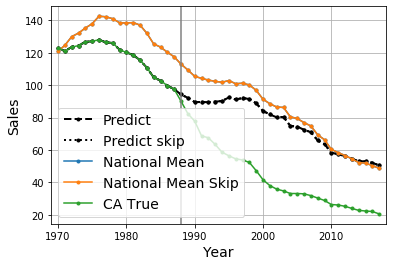

In [132]:
yearspad = np.pad(years, (padl, padr), mode='linear_ramp', end_values=(years[0]-padl, years[-1]+padr))

plt.plot(yearspad, capred ,'k--', lw=2, marker='.', label='Predict')
plt.plot(yearspad, capred2 ,'k:', lw=2, marker='.', label='Predict skip')
plt.plot(years, meansales, marker='.', label='National Mean')
plt.plot(years, meansalesskip, marker='.', label='National Mean Skip')
plt.plot(years, casales, marker='.', label='CA True')
plt.axvline(years[i1], color='gray')
plt.xlim(years[0]-1, years[-1]+1)
plt.grid(which='both')
plt.legend(fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Year', fontsize=14)


In [133]:
capred[np.where(yearspad==2000)[0][0]]- casales[np.where(years==2000)[0][0]]

42.457516812063346

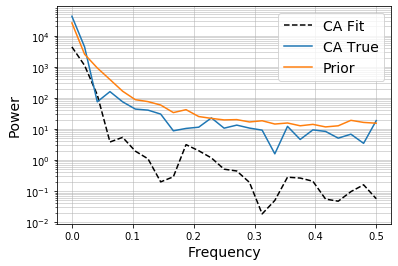

In [134]:
ff = getf(padl, padr)
plt.plot(ff, caps, 'k--', label='CA Fit')
# plt.plot(np.fft.rfftfreq(casales.size), psfunc(casales), label='CA unpad')
plt.plot(ff, pkca, label='CA True')
# plt.plot(np.fft.rfftfreq(casales.size), psf(xp[:, padl:-padr].mean(axis=0)), label='Nat-mean unpad')
plt.plot(ff, pkm, label='Prior')
plt.yscale('log')
plt.ylabel('Power', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.legend( fontsize=14)
plt.grid(which='both', lw=0.5)

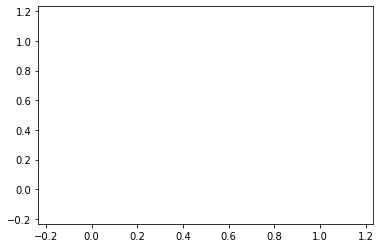

In [135]:
plt.plot(xp[0][padl:-padr])
plt.plot(xp[5][padl:-padr])
plt.plot(xp[2][padl:-padr])
plt.plot(xp[10][padl:-padr])

### Check fourier modes

In [ ]:
modes = np.fft.rfft(xp, norm='ortho')
camodes = np.fft.rfft(casales-meansalesca, norm='ortho')

pkcanopad = (abs(camodes)**2 )
pknopad = (abs(modes)**2 ).mean(axis=0)
pkscaling = (pknopad/2)**0.5

plt.plot(abs(modes.real.T)/pkscaling.reshape(-1,1), alpha=0.3);
plt.plot(abs(camodes.real)/pkscaling, 'k', lw=2)
for ii in [1, 10, 20, 30]:
    plt.plot(abs(modes.real[ii])/pkscaling, lw=2)
plt.show()

plt.plot(abs(modes.imag.T)/pkscaling.reshape(-1,1), alpha=0.32);
plt.plot(abs(camodes.imag)/pkscaling, 'k', lw=2)
for ii in [1, 10, 20, 30]:
    plt.plot(abs(modes.imag[ii])/pkscaling, lw=2)
# plt.plot(pkcanopad/pknopad, 'k--')
plt.show()


# plt.hist((modes.real/pkm).T.flatten(), normed=True);
# plt.hist((camodes.real/pkm).T.flatten(), alpha=0.5, normed=True);
plt.hist((modes.real/pkscaling).T.flatten(), normed=True);
# plt.hist((camodes.real/pkscaling).flatten(), normed=True, alpha=0.5);


# put it alltogether

In [136]:
statesales = {}
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')
    statesales[s] = sales[loc]['Data_Value'].values.astype('float32')

ss = 'CA'
tmp = statesales['CA'].copy() 
statesales['CA'] = statesales[ss].copy()
statesales[ss] = tmp.copy()

salearray = np.zeros((len(ils), years.size))
for i in range(len(statesid)): salearray[i] = statesales[ils[i]]
    
# salearrayca = []
# for i in range(len(statesid)):
#     if ils[i] == 'CA': continue
#     else: salearrayca.append(statesales[ils[i]])
# salearrayca = np.array(salearrayca)

salearrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: salearrayskip.append(statesales[ils[i]])
salearrayskip = np.array(salearrayskip)
salearrayca = salearrayskip

casales = statesales['CA']
meansales = salearrayca.mean(axis=0)
meansalesskip = salearrayskip.mean(axis=0)

i1 = 18
yy = years.size



In [137]:
# ii = 0 
# preds = []
# for padl, padr in [[1, 1],  [yy//2, yy//2], [yy, yy], [yy*2, yy*2]]:
# # for padl, padr in [[yy//2, yy//2]]:
#     ii +=1
#     xp, means, pk, pkca = setupdata(salearrayskip, casales, padl, padr)
#     pkm = pk.mean(axis=0)
#     ffpad  = getf(padl, padr)
#     tfpad = gettfprior(salearrayskip, padl, padr)
#     pktrue = pkm/tfpad
#     plt.plot(ffpad, pkm, 'C%d--'%ii)
#     plt.plot(ffpad, pktrue, 'C%d'%ii)
# plt.loglog()
# plt.grid()
# plt.legend()



Expected difference :  [35.8179681]


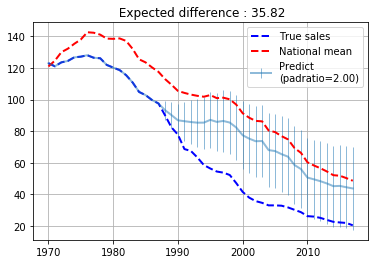

In [138]:
ii = 0 
preds = []
# for padl, padr in [[1, 1],  [10, 10], [yy//2, yy//2], [yy, yy]]:
for padl, padr in [[yy, yy]]:
    ii +=1
    xp, means, pk, pkca = setupdata(salearrayskip, casales, padl, padr)
    pkm = pk.mean(axis=0)
    ffpad  = getf(padl, padr)
    tfpad = gettfprior(salearrayskip, padl, padr)
    pktrue = pkm/tfpad
    
    p0 = np.ones(pkm.size*2)
    tomin = lambda p: chisq(p, means, casales, pktrue, padl)
    pp = minimize(tomin, p0).x
    capred = pred(pp, means)
        
    cov = getcov(pktrue, padl, padr)
    err = cov.diagonal()**0.5
    preds.append([capred, err])

    if padr: plt.errorbar(years, capred[padl:-padr], err[padl:-padr], alpha=0.5, lw=2, elinewidth=1, label='Predict\n(padratio=%.2f)'%(2*padl/yy))
    else: plt.errorbar(years, capred[padl:], err[padl:], alpha=0.5, lw=2, elinewidth=1, label=ii)
    print('Expected difference : ', capred[padl:-padr][years==2000] - casales[years==2000])
    plt.title(' Expected difference : %.2f'%(capred[padl:-padr][years==2000] - casales[years==2000]))
    
plt.plot(years, casales, 'b--', lw=2, label='True sales')
plt.plot(years, meansales, 'r--', lw=2, label='National mean')
plt.grid()
plt.legend()

capredfid, errfid, covfid = capred[padl:-padr].copy(), err[padl:-padr].copy(), cov[padl:-padr, padl:-padr].copy()
# plt.xlim(years[i1], years[-1])
# plt.ylim(20, 100)

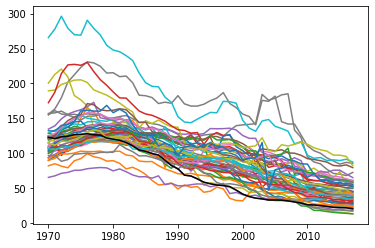

In [139]:
for ii in ils:
    plt.plot(years, statesales[ils[ii]])
plt.plot(years, casales, 'k')


# 2 data

In [140]:
d1 = costarray - costarray.mean(axis=0)
d2 = salearray - salearray.mean(axis=0)

In [159]:
padl, padr = 0, 0
yearspad = np.pad(years, (padl, padr), mode='linear_ramp', end_values=(years[0]-padl, years[-1]+padr))
ffpad = getf(padl, padr)

d = np.pad(salearray.copy(), [(0, 0), (padl, padr)], mode='constant', constant_values=0)
means = d.mean(axis=0)
std = d.std(axis=0)
xp1 = d - means
# xp1[:, padl:-padr] /= std[padl:-padr]

d = np.pad(costarray.copy(), [(0, 0), (padl, padr)], mode='constant', constant_values=0)
means = d.mean(axis=0)
std = d.std(axis=0)
xp2 = d - means
# xp2[:, padl:-padr] /= std[padl:-padr]

d = np.pad(pincarray.copy(), [(0, 0), (padl, padr)], mode='constant', constant_values=0)
means = d.mean(axis=0)
std = d.std(axis=0)
xp3 = d - means
# xp3[:, padl:-padr] /= std[padl:-padr]

pss1 = []
for i in range(xp.shape[0]): pss1.append(psfunc(xp1[i]))
pss1 = np.array(pss1)

pss12 = []
for i in range(xp.shape[0]): pss12.append(psfunc(xp1[i], xp2[i]))
pss12 = np.array(pss12)
pss2 = []
for i in range(xp.shape[0]): pss2.append(psfunc(xp2[i]))
pss2 = np.array(pss2)

pss13 = []
for i in range(xp.shape[0]): pss13.append(psfunc(xp1[i], xp3[i]))
pss13 = np.array(pss13)
pss3 = []
for i in range(xp.shape[0]): pss3.append(psfunc(xp3[i]))
pss3 = np.array(pss3)

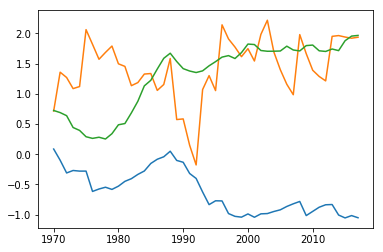

In [160]:
ii = 21
plt.plot(yearspad, xp1[ii]/xp1.std(axis=0))
plt.plot(yearspad, xp2[ii]/xp2.std(axis=0))
plt.plot(yearspad, xp3[ii]/xp3.std(axis=0))

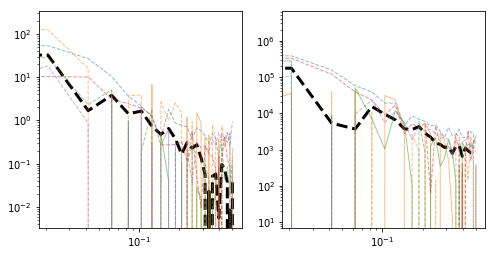

In [161]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
plt.plot(ffpad, pss12.mean(axis=0), 'k-', lw=3)
plt.plot(ffpad, -pss12.mean(axis=0), 'k--', lw=3)
for i in range(5):
    plt.plot(ffpad, pss12[i], 'C%d-'%i, lw=1, alpha=0.5)
    plt.plot(ffpad, -pss12[i], 'C%d--'%i, lw=1, alpha=0.5)
plt.yscale('log')
plt.xscale('log')

plt.subplot(122)
plt.plot(ffpad, pss13.mean(axis=0), 'k-', lw=3)
plt.plot(ffpad, -pss13.mean(axis=0), 'k--', lw=3)
for i in range(5):
    plt.plot(ffpad, pss13[i], 'C%d-'%i, lw=1, alpha=0.5)
    plt.plot(ffpad, -pss13[i], 'C%d--'%i, lw=1, alpha=0.5)
plt.yscale('log')
plt.xscale('log')


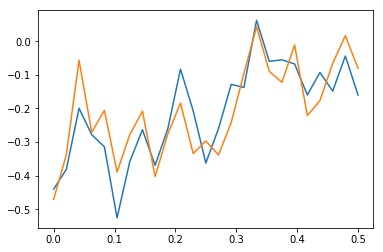

In [165]:
plt.plot(ffpad, (pss12/(pss1*pss2)**0.5).mean(axis=0))
plt.plot(ffpad, (pss12.mean(axis=0)/(pss1.mean(axis=0)*pss2.mean(axis=0))**0.5))

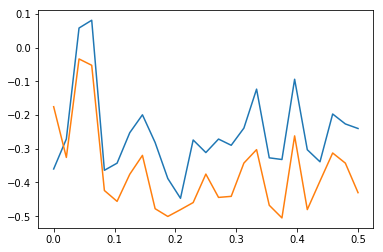

In [166]:
plt.plot(ffpad, (pss13/(pss1*pss3)**0.5).mean(axis=0))
plt.plot(ffpad, (pss13.mean(axis=0)/(pss1.mean(axis=0)*pss3.mean(axis=0))**0.5))

## Do Analysis

In [ ]:
psfunc()

In [31]:
np.conj(1+1j)

(1-1j)

In [171]:
# # def pred2d(p, means, prior=False):
# #     u, v = p[:p.size//2], p[p.size//2:]
# #     s = u + 1j*v
# #     x = np.fft.irfft(s, norm='ortho') + means
# #     if prior: 
# #         ps = abs(s)**2
# #         return x, ps
# #     else: return x


# def chisq2d(p, nc, means, vals, priorka, priorkx, padl, padr, sigma=1, i1=18, preds=False):
#     pc = p.reshape(-1, nc)
#     nd = pc.shape[0]
#     ss = []
#     xx = []
#     psa, psx = [], []
#     for i in range(nc):
#         ss.append(pc[:, i][:nd//2] + 1j*pc[:, i][nd//2:])
#         xx.append(np.fft.irfft(ss[-1], norm='ortho') + means[i])
#         psa.append(abs(ss[-1])**2)
#     for i in range(nc):
#         for j in range(i+1, nc):
#             psx.append((ss[i]*ss[j].conj()))
            
#     sigma = [0.01, 0.01]
#     res = sum((xx[0][padl:padl+i1] - vals[0][:i1])**2 / sigma[0]**2)
#     prior = psa[0]*priorka[0]
                           
#     for i in range(1, nc):
#         if padr: res += sum((xx[i][padl:-padr] - vals[i][:])**2 / sigma[i]**2)
#         else: res += sum((xx[i][padl:] - vals[i][:])**2 / sigma[i]**2)
#         prior += psa[i]*priorka[i]
        
#     ix = 0
#     for i in range(nc):
#         for j in range(i+1, nc):
#             prior += abs(2*psx[ix].real*priorkx[ix])
#             ix +=1
#     if preds: return xx
#     else: return sum(res) + sum(prior)


# nc = 2
# # padl, padr = years.size//2, years.size//2
# # padl, padr = years.size, years.size
# padl, padr = 0, 0

# xp1, means1, pk1, pkca1 = setupdata(salearrayca, casales, padl, padr)
# pkm1 = pk1.mean(axis=0)
# # tfpad = gettfprior(salearrayca, padl, padr)
# # pkm1 = pkm1/tfpad

# xp2, means2, pk2, pkca2 = setupdata(costarrayca, cacosts, padl, padr)
# pkm2 = pk2.mean(axis=0)
# # tfpad = gettfprior(costarrayca, padl, padr)
# # pkm2 = pkm2/tfpad

# pkx12 = psfunc(xp1, xp2).mean(axis=0)
# # tfpad = gettfprior(salearrayca, data2=costarrayca, padl=padl, padr=padr)
# # pkx12 = pkx12/tfpad

# priorka1, priorka2, priorkx = [], [], []
# for i in range(pkm1.size):
#     tmp = np.linalg.inv(np.array([[pkm1[i], pkx12[i]], [pkx12[i], pkm2[i]]]))
#     priorka1.append(tmp[0, 0])
#     priorka2.append(tmp[1, 1])
#     priorkx.append(tmp[0, 1])
# priorka = [np.array(priorka1), np.array(priorka2)]
# priorkx = [np.array(pkx12)]
# means = [means1, means2]
# vals = [casales, cacosts]
# # #########

# print('Minimize')
# p0 = np.ones(pkm1.size*2*nc)
# # pp = minimize(tomin, p0, method='Nelder-Mead', options={'maxfev':1000}).x
# tomin = lambda p: chisq2d(p, nc, means, vals, priorka, priorkx, padl, padr)
# pp = minimize(tomin, p0).x
# # capred, caps = pred(pp, means, prior=True)
# capred = chisq2d(pp, nc, means, vals, priorka, priorkx, padl, padr, preds=True)
# # capred, caps = pred(pp, means, prior=True)


Minimize


In [110]:


# def chisq2d2(p, nc, means, vals, cov, padl, padr, sigma=1, i1=18, preds=False):
#     pc = p.reshape(-1, nc)
#     nd = pc.shape[0]
#     ss = []
#     xx = []
#     for i in range(nc):
#         ss.append(pc[:, i][:nd//2] + 1j*pc[:, i][nd//2:])
#         xx.append(np.fft.irfft(ss[-1], norm='ortho') + means[i])
            
#     sigma = [1, 0.01]
#     res = sum((xx[0][padl:padl+i1] - vals[0][:i1])**2 / sigma[0]**2)
    
    
#     for i in range(1, nc):
#         if padr: res += sum((xx[i][padl:-padr] - vals[i][:])**2 / sigma[i]**2)
#         else: res += sum((xx[i][padl:] - vals[i][:])**2 / sigma[i]**2)

#     icov = np.linalg.inv(cov)
#     ss = np.concatenate(ss)
#     prior = np.dot(ss.conj(), np.dot(icov, ss))
#     if preds: return xx
#     else: return sum(res) + prior


# nc = 2
# # padl, padr = years.size//2, years.size//2
# # padl, padr = years.size, years.size
# padl, padr = 0, 0

# xp1, means1, pk1, pkca1 = setupdata(salearrayca, casales, padl, padr)
# pkm1 = pk1.mean(axis=0)
# # tfpad = gettfprior(salearrayca, padl, padr)
# # pkm1 = pkm1/tfpad

# xp2, means2, pk2, pkca2 = setupdata(costarrayca, cacosts, padl, padr)
# pkm2 = pk2.mean(axis=0)
# # tfpad = gettfprior(costarrayca, padl, padr)
# # pkm2 = pkm2/tfpad

# pkx12 = psfunc(xp1, xp2).mean(axis=0)
# # tfpad = gettfprior(salearrayca, data2=costarrayca, padl=padl, padr=padr)
# # pkx12 = pkx12/tfpad

# cov = np.zeros((nc*pkm1.size, nc*pkm1.size))
# pka = np.eye(nc*pkm1.size, nc*pkm1.size)
# cov[pka.astype(bool)] = np.concatenate((pkm1, pkm2))
# pkx = np.eye(nc*pkm1.size, nc*pkm1.size, pkm1.size)
# cov[pkx.astype(bool)] = pkx12
# pkx = np.eye(nc*pkm1.size, nc*pkm1.size, -pkm1.size)
# cov[pkx.astype(bool)] = pkx12

# means = [means1, means2]
# vals = [casales, cacosts]
# # #########

# print('Minimize')
# p0 = np.ones(pkm1.size*2*nc)
# tomin = lambda p: chisq2d2(p, nc, means, vals, cov, padl, padr)
# tomin(p0)
# pp = minimize(tomin, p0).x
# capred = chisq2d2(pp, nc, means, vals, cov, padl, padr, preds=True)



In [365]:


def chisq2d2(p, nc, means, vals, cov, padl, padr, sigma=1, i1=18, preds=False, norm=None, stds=None):
    pc = p.reshape(-1, nc)
    nd = pc.shape[0]
    ss = []
    xx = []
    for i in range(nc):
        ss.append(pc[:, i][:nd//2] + 1j*pc[:, i][nd//2:])
        xpred = np.fft.irfft(ss[-1], norm='ortho')
        if norm == 'mean': xpred *= means[i]
        elif norm == 'std': xpred *= stds[i]
        xpred += means[i]
        xx.append(xpred)
            
    sigma = 0.1#[1, 0.01, 1]
    res = sum((xx[0][padl:padl+i1] - vals[0][:i1])**2 / sigma**2)
    
    
    for i in range(1, nc):
        if padr: res += sum((xx[i][padl:-padr] - vals[i][:])**2 / sigma**2)
        else: res += sum((xx[i][padl:] - vals[i][:])**2 / sigma**2)

    icov = np.linalg.inv(cov)
    ss = np.concatenate(ss)
    prior = np.dot(ss.conj(), np.dot(icov, ss))
    if preds: return xx
    else: return sum(res) + prior



In [171]:

# padl, padr = years.size//2, years.size//2
# padl, padr = years.size, years.size
padl, padr = 0, 0

nc = 0 
xps = []
meanar = []
stdar = []
valar = []
pka, pkx = [], []
norm = True
capred2norm = []
for norm in [None, 'std', 'mean']:
    for ii, dv in enumerate([[salearrayca, casales], [costarrayca, cacosts]]):
        nc +=1
        dd, vv = dv
        stds = 0 
        if norm == 'std': xp, means, pk, pkca, stds = setupdata(dd, vv, padl, padr, norm=norm)
        else: xp, means, pk, pkca = setupdata(dd, vv, padl, padr, norm=norm)
        # tfpad = gettfprior(dd, padl, padr)
        # pk = pk/tfpad
        pka.append(pk.mean(axis=0))
        xps.append(xp)
        pkxx = []
        pkx.append([])
        for j in range(len(xps)-1):
            pkx[j].append(psfunc(xps[-1], xps[j]).mean(axis=0))

        meanar.append(means)
        valar.append(vv)
        stdar.append(stds)

    cov2 = np.diag(np.concatenate(pka))
    for i in range(len(xps)-1):
        c = np.diag(np.concatenate(pkx[i]), (i+1)*pkx[i][0].size)
        cov2 = cov2 + c+c.T
    # #########

    print('Minimize')
    p0 = np.ones(pkca.size*2*nc)
    tomin = lambda p: chisq2d2(p, nc, meanar, valar, cov2, padl, padr, norm=norm, stds=stdar)
    tomin(p0)
    pp = minimize(tomin, p0).x
    capred2 = chisq2d2(pp, nc, meanar, valar, cov2, padl, padr, preds=True, norm=norm, stds=stdar)
    capred2norm.append(capred2)


Minimize


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)


Minimize


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


Minimize


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:485: ComplexWarning: Casting comple

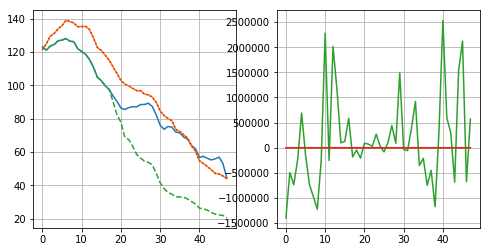

In [185]:
plt.figure(figsize=(8,4))
plt.subplot(121)
for i in range(2): plt.plot(capred2norm[i][0])
plt.plot(casales, '--')
plt.plot(meansales, ':')
plt.grid(which='both')
plt.subplot(122)
for i in range(3): plt.plot(capred2norm[i][1])
plt.plot(cacosts)
plt.grid(which='both')


In [35]:

padl, padr = 0, 0

nc = 0 
xps = []
meanar = []
valar = []
norm = True
pka, pkx = [], []
for ii, dv in enumerate([[salearrayca, casales]]):
    nc +=1
    dd, vv = dv
    xp, means, pk, pkca = setupdata(dd, vv, padl, padr, norm=norm)
    # tfpad = gettfprior(dd, padl, padr)
    # pk = pk/tfpad
    pka.append(pk.mean(axis=0))
    xps.append(xp)
    pkxx = []
    pkx.append([])
    for j in range(len(xps)-1):
        pkx[j].append(psfunc(xps[-1], xps[j]).mean(axis=0))

    meanar.append(means)
    valar.append(vv)

cov2 = np.diag(np.concatenate(pka))
for i in range(len(xps)-1):
    c = np.diag(np.concatenate(pkx[i]), (i+1)*pkx[i][0].size)
    cov2 = cov2 + c+c.T
# #########

print('Minimize')
p0 = np.ones(pkca.size*2*nc)
tomin = lambda p: chisq2d2(p, nc, meanar, valar, cov2, padl, padr, norm=norm)
tomin(p0)
pp = minimize(tomin, p0).x
capred1 = chisq2d2(pp, nc, meanar, valar, cov2, padl, padr, preds=True, norm=norm)



Minimize


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)


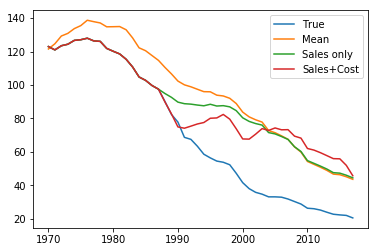

In [39]:
plt.plot(years, casales, label='True')
plt.plot(years, meansales, label='Mean')
plt.plot(years, capred1[0], label='Sales only')
plt.plot(years, capred2[0], label='Sales+Cost')
plt.legend()

In [310]:

# padl, padr = years.size//2, years.size//2
# padl, padr = years.size, years.size
padl, padr = 0, 0

nc = 0 
xps = []
meanar = []
valar = []
norm = False
pka, pkx = [], []
for ii, dv in enumerate([[salearrayca, casales], [costarrayca, cacosts], [pincarrayca, capinc]]):
    nc +=1
    dd, vv = dv
    xp, means, pk, pkca = setupdata(dd, vv, padl, padr, norm=norm)
    # tfpad = gettfprior(dd, padl, padr)
    # pk = pk/tfpad
    pka.append(pk.mean(axis=0))
    xps.append(xp)
    pkxx = []
    pkx.append([])
    for j in range(len(xps)-1):
        pkx[j].append(psfunc(xps[-1], xps[j]).mean(axis=0))

    meanar.append(means)
    valar.append(vv)

cov2 = np.diag(np.concatenate(pka))
for i in range(len(xps)-1):
    c = np.diag(np.concatenate(pkx[i]), (i+1)*pkx[i][0].size)
    cov2 = cov2 + c+c.T
# #########

print('Minimize')
p0 = np.ones(pkca.size*2*nc)
tomin = lambda p: chisq2d2(p, nc, meanar, valar, cov2, padl, padr, norm=norm)
tomin(p0)
pp = minimize(tomin, p0).x
capred3 = chisq2d2(pp, nc, meanar, valar, cov2, padl, padr, preds=True, norm=norm)



Minimize


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/linesearch.py:171: ComplexWarn

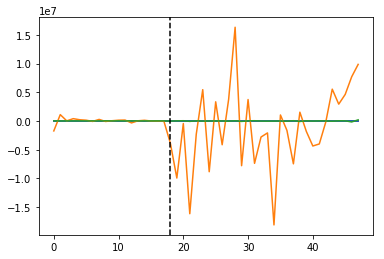

In [311]:
plt.plot(casales, 'r')
plt.plot(meansales, 'b')
plt.plot(capred1[0], 'C0')
plt.plot(capred2[0], 'C1')
plt.plot(capred3[0], 'C2')
plt.axvline(i1, ls='--', color='k')

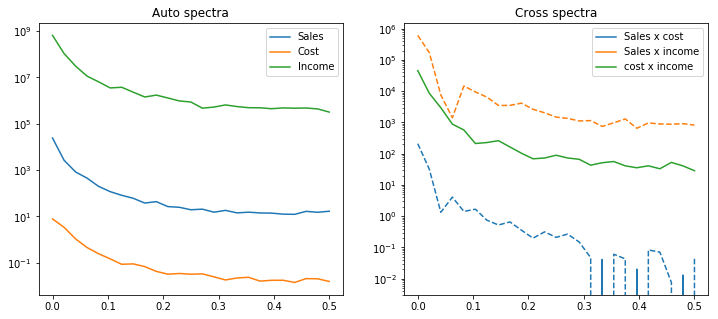

In [312]:
ff = getf(0, 0)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(ff, pka[0], label='Sales')
plt.plot(ff, pka[1], label='Cost')
plt.plot(ff, pka[2], label='Income')
plt.yscale('log')
plt.title('Auto spectra')
plt.legend()
plt.subplot(122)
plt.plot(ff, pkx[0][0], 'C0', label='Sales x cost')
plt.plot(ff, -pkx[0][0], 'C0--')
# plt.plot(ff, -pss12.mean(axis=0), 'k:', lw=2)
plt.plot(ff, pkx[0][1], 'C1', label='Sales x income')
plt.plot(ff, -pkx[0][1], 'C1--')
# plt.plot(ff, -pss13.mean(axis=0), 'k:', lw=2)
plt.plot(ff, pkx[1][0], 'C2', label='cost x income')
plt.plot(ff, -pkx[1][0], 'C2--')
plt.yscale('log')
plt.title('Cross spectra')
plt.legend()


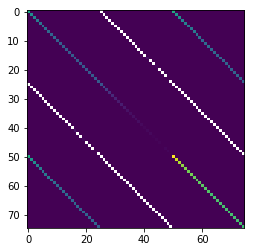

In [316]:
plt.imshow(cov2, norm=LogNorm())


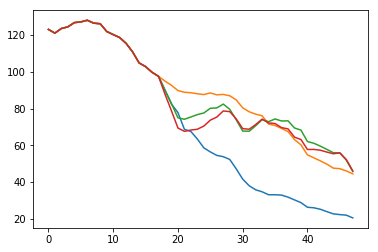

# Non gauss

Expected difference :  [36.52436389]


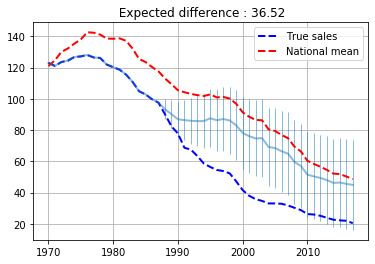

In [28]:
ii = 0 
preds = []
padl, padr = years.size//2, years.size//2

xp, means, pk, pkca = setupdata(salearrayskip, casales, padl, padr)
pkm = pk.mean(axis=0)
ffpad  = getf(padl, padr)
tfpad = gettfprior(salearrayskip, padl, padr)
pktrue = pkm/tfpad
pkfid = pktrue.copy()

p0 = np.ones(pkm.size*2)
tomin = lambda p: chisq(p, means, casales, pktrue, padl)
pp = minimize(tomin, p0).x
capred = pred(pp, means)

cov = getcov(pktrue, padl, padr)
err = cov.diagonal()**0.5
preds.append([capred, err])

# if padr: plt.errorbar(years, capred[padl:-padr], err[padl:-padr], alpha=0.5, lw=2, elinewidth=1, label='Predict\n(padratio=%.2f)'%(2*padl/yy))
# else: plt.errorbar(years, capred[padl:], err[padl:], alpha=0.5, lw=2, elinewidth=1, label=ii)

plt.errorbar(years, capred[padl:-padr], err[padl:-padr], alpha=0.5, lw=2, elinewidth=1)
print('Expected difference : ', capred[padl:-padr][years==2000] - casales[years==2000])
plt.title(' Expected difference : %.2f'%(capred[padl:-padr][years==2000] - casales[years==2000]))
    
plt.plot(years, casales, 'b--', lw=2, label='True sales')
plt.plot(years, meansales, 'r--', lw=2, label='National mean')
plt.grid()
plt.legend()

capredfid = capred.copy()
errfid = err.copy()
# plt.xlim(years[i1], years[-1])
# plt.ylim(20, 100)

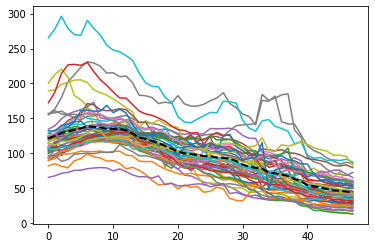

In [29]:
plt.plot(salearray.T)
plt.plot(salearray.mean(axis=0), 'k', ls="--", lw=2)

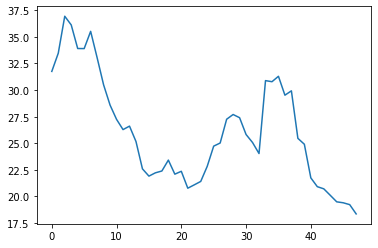

In [30]:
plt.plot(salearray.std(axis=0))

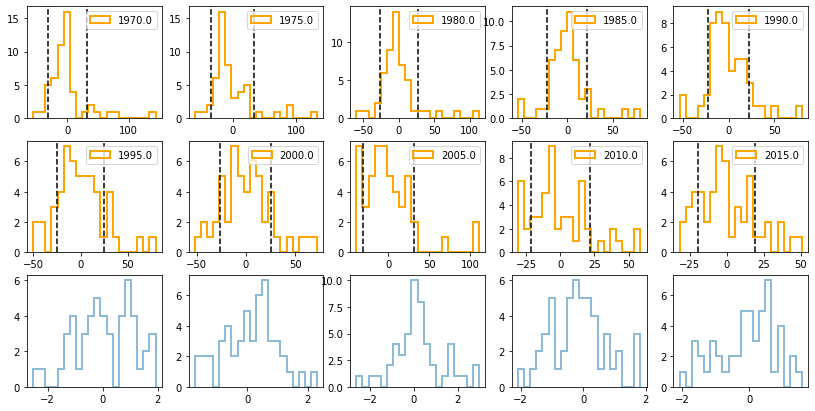

In [31]:
fig, ax = plt.subplots(3, 5, figsize=(14, 7))
for i in range(0, 50, 5):
    axis = ax.flatten()[i//5]
    axis.hist((salearray-salearray.mean(axis=0))[:, i], histtype='step', label=years[i], lw=2, bins=20, color='orange')
    axis.axvline(salearray.std(axis=0)[i], color='k', ls="--")
    axis.axvline(-salearray.std(axis=0)[i], color='k', ls="--")
    axis.legend()

for i in range(5):
    ax[-1, i].hist(np.random.normal(size=50), bins=20, alpha=0.5, histtype='step', lw=2)
plt.show()


Text(0.5, 1.0, '$\\sigma$')

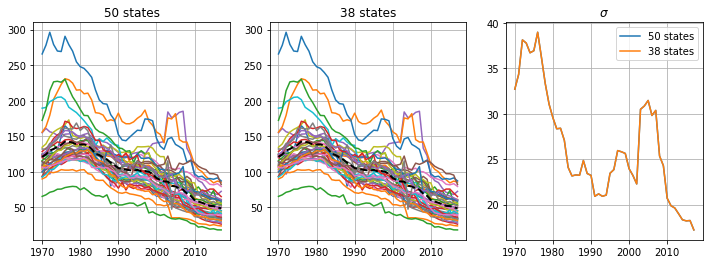

In [32]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.plot(years, salearrayca.T)
plt.plot(years, salearrayca.mean(axis=0), 'k--', lw=2)
plt.grid()
plt.title('50 states')
plt.subplot(132)
plt.plot(years, salearrayskip.T)
plt.plot(years, salearrayskip.mean(axis=0), 'k--', lw=2)
plt.grid()
plt.title('38 states')
plt.subplot(133)
plt.plot(years, salearrayca.std(axis=0), label='50 states')
plt.plot(years, salearrayskip.std(axis=0), label='38 states')
plt.grid()
plt.legend()
plt.title('$\sigma$')

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


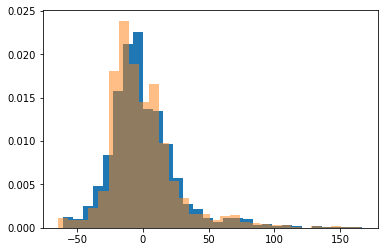

In [33]:
normed = True
nbins = 30

plt.hist((salearray - salearray.mean(axis=0)).flatten(), bins=nbins, normed=normed)
plt.hist((salearrayskip - salearrayskip.mean(axis=0)).flatten(), bins=nbins, normed=normed, alpha=0.5)
plt.show()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykerne

mu=-0.00, s=-20.11
mu=0.00, s=0.21
mu=0.00, s=0.78
mu=-0.05, s=0.20


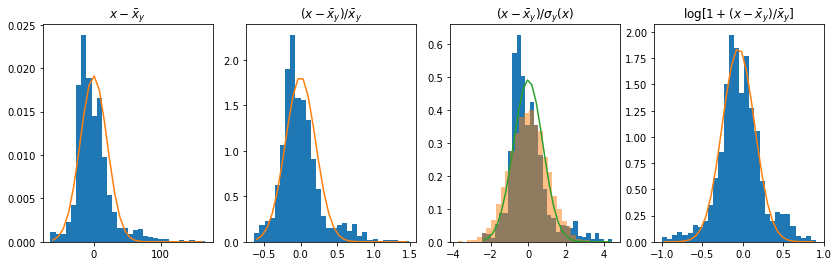

In [29]:
from scipy.optimize import curve_fit as cf
from scipy.optimize import minimize
from scipy.stats import skew, kurtosis

def gauss(x, a, mu, s):
# def gauss(x, p):
#     a, mu, s = p
    norm = 1/np.sqrt(2*np.pi*s**2)
#     norm = 1
    return a*norm*np.exp(-0.5*((x-mu)/s)**2)

def fitgauss(xx, bins, normed):
    h, x = np.histogram(xx, bins=bins, normed=normed)
    x = x[1:] + x[:-1]
    x /= 2 
    p0 = [h.max(), xx.mean(), xx.std()]
    ftomin = lambda p: ((gauss(x, *p) - h)**2).sum()
    pp = minimize(ftomin, p0, method='Nelder-Mead', options={'maxiter':5000})
    print('mu=%.2f, s=%.2f'%(pp.x[1],pp.x[2]))
#     pp = cf(gauss, x, h, p0, )[0]
    return (x, gauss(x, *pp.x))
#     return (x, gauss(x, *pp))


normed = True
nbins = 30
fsize = 12
d = salearrayca.copy()
ni = 4
plt.figure(figsize = (14, 4))
plt.subplot(1, ni, 1)
plt.hist((d - d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
tx, ty = fitgauss((d - d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
plt.plot(tx, ty)
plt.title(r'$x-\bar{x}_y$', fontsize=fsize)

plt.subplot(1, ni, 2)
plt.hist(((d - d.mean(axis=0))/d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
tx, ty = fitgauss(((d - d.mean(axis=0))/d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
plt.plot(tx, ty)
plt.title(r'$(x-\bar{x}_y)/\bar{x}_y$', fontsize=fsize)

plt.subplot(1, ni, 3)
plt.hist(((d - d.mean(axis=0))/d.std(axis=0)).flatten(), bins=nbins, normed=normed)
plt.hist(np.random.normal(size=10000), bins=nbins, normed=normed, alpha=0.5)
tx, ty = fitgauss(((d - d.mean(axis=0))/d.std(axis=0)).flatten(), bins=nbins, normed=normed)
plt.plot(tx, ty)
plt.title(r'$(x-\bar{x}_y)/\sigma_y(x)$', fontsize=fsize)

plt.subplot(1, ni, 4)
plt.hist(np.log(1+(d - d.mean(axis=0))/d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
tx, ty = fitgauss(np.log(1+(d - d.mean(axis=0))/d.mean(axis=0)).flatten(), bins=nbins, normed=normed)
plt.plot(tx, ty)
plt.title(r'log[$1+(x-\bar{x}_y)/\bar{x}_y$]', fontsize=fsize)


plt.show()

### Transformations

In [35]:
def trans(z, eps, eta=1, sig=1, inv=False):
    if inv: 
        if eta  == 0: return z
        x = z*eta
        x =np.arcsinh(x)
        x /= eta
        x *= eps
        x +=1
        x = np.log(x)
        x /= sig
        x /= eps
        return x
    else: 
        if eta == 0: return z
        return np.sinh(eta*((np.exp(sig*eps*z) - 1)/eps))/eta

    

1.1609249114990234 2.71128511428833
mu=0.00, s=0.77

mu=-0.10, s=0.35
2.659985065460205 12.71702111811534


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packa

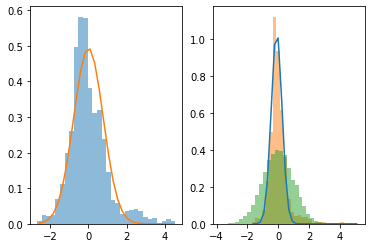

In [48]:
d = salearrayca.copy()
dd = (d - d.mean(axis=0)).flatten()
dz = ((d - d.mean(axis=0))/d.std(axis=0)).flatten()
# plt.hist(dz)
plt.subplot(121)
print(skew(dz), kurtosis(dz))
plt.hist(dz, alpha=0.5, bins=nbins, normed=normed)
tx, ty = fitgauss(dz, bins=nbins, normed=normed)
plt.plot(tx, ty)


plt.subplot(122)
# plt.hist(np.random.normal(size=1000), normed=True, alpha=0.2)
# plt.hist(trans(dz, eps=1, eta=1, sig=1), alpha=0.5, normed=True)
# plt.hist(trans(dz, eps=1, eta=1, sig=.1), alpha=0.5, normed=True)

print('')
# yy = trans(dz, eps=.01, eta=1, sig=.2)
yy = trans(dz, eps=.03, eta=1, sig=.5)
tx, ty = fitgauss(yy, bins=nbins, normed=normed)
plt.plot(tx, ty)
print(skew(yy), kurtosis(yy))
plt.hist(yy, alpha=0.5, bins=nbins, normed=normed)
plt.hist(np.random.normal(size=10000), alpha=0.5, bins=nbins, normed=normed)


# yy = trans(dz, eps=1, eta=1, sig=.3)
# tx, ty = fitgauss(yy, bins=nbins, normed=normed)
# plt.plot(tx, ty)
# print(skew(yy), kurtosis(yy))
# plt.hist(yy, alpha=0.5, bins=nbins, normed=normed)

plt.show()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()
/glob

 final_simplex: (array([[0.04716613, 1.31907864],
       [0.0471551 , 1.31905457],
       [0.04720941, 1.31900015]]), array([0.11582292, 0.11582292, 0.11584206]))
           fun: 0.11582291708802256
       message: 'Optimization terminated successfully.'
          nfev: 59
           nit: 27
        status: 0
       success: True
             x: array([0.04716613, 1.31907864])
0.06166666666666667
mu=-0.27, s=0.87


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]


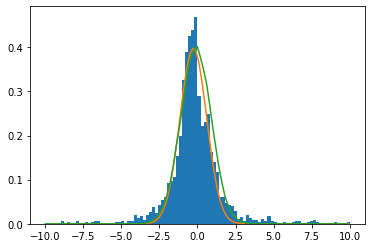

In [49]:
normhist = np.histogram(np.random.normal(size=100000), bins=100, normed=True, range=(-10, 10))
d = salearrayca.copy()
dz = ((d - d.mean(axis=0))/d.std(axis=0)).flatten()
# stdmean = salearrayca.std(axis=0).mean()
# dz = ((d - d.mean(axis=0))/stdmean).flatten()

def fithist(p, z, normhist):
    eps, sig = p
    h, x = normhist
    dzt = trans(dz, eps=eps, sig=sig)
    hy, _ = np.histogram(dzt, bins=x, normed=True )
    return h, hy, dzt

def tomin(p):
    hx, hy, dzt = fithist(p, dz, normhist)
    m, s = dzt.mean(), dzt.std()
    sk = (((dzt-m)/s)**3).mean()
#     print(sum((hx-hy)**2))
    return sum((hx-hy)**2) #+ skew(dzt)/2. + kurtosis(dzt)/2.
    
    
# pp = minimize(tomin, [.1, 1], method='Nelder-Mead', options={'ftol':0.})
pp = minimize(tomin, [0.1, 1], method='Nelder-Mead')
print(pp)
print((trans(dz, eps=pp.x[0], sig=pp.x[1]) > 5).sum()/dz.size)

# plt.hist(trans(dz, eps=pp.x[0], sig=pp.x[1]), bins=20, normed=True, alpha=0.5)
yy = trans(dz, eps=pp.x[0], sig=pp.x[1])
plt.hist(yy, bins=normhist[1], normed=True)
tx, ty = fitgauss(yy, bins=normhist[1], normed=normed)
plt.plot(tx, ty)
plt.plot(normhist[1][:-1], normhist[0])

In [50]:


def setupdatatrans(salearrayca, casales, padl, padr, stdnorm, trans, al=1.):
    '''returns xp, means, pk, pkca'''
    d = np.pad(salearrayca.copy(), [(0, 0), (padl, padr)], mode='constant', constant_values=0)
    means = d.mean(axis=0)*al
#     std = d.mean(axis=0)*al
    xp = d - means
    std = xp.std(axis=0)
    std[std == 0] = 1
    xp /= std
    xp = trans(xp)
    pk = []
    for i in range(xp.shape[0]): pk.append(psfunc(xp[i]))
    pk = np.array(pk)

    xc = casales-means[padl:-padr]
    xc /= std[padl:-padr]
    xc= trans(xc)
    if padr: pkca = psfunc(np.pad(xc, (padl, padr), mode='constant', constant_values=0))
    else: pkca = psfunc(np.pad(xc, (padl, padr), mode='constant', constant_values=0))
    return xp, xc, means, std, pk, pkca



def gettfpriortrans(data1, padl, padr, n=2000, samples=False, seed=100, al=1.0, data2=None, trans=None, stdnorm=None):

    yy = years.size
    ff = np.fft.rfftfreq(yy)
    xp = data1 - data1.mean(axis=0)*al
    if stdnorm is not None: xp /= xp.std(axis=0)
    if trans is not None: xp = trans(xp)
    if data2 is not None: 
        xp2 = data2 - data2.mean(axis=0)*al
        if stdnorm is not None: xp2 /= xp2.std(axis=0)
        if trans is not None: xp2= trans(xp2)
    else: xp2 = xp
    p1 =  np.fft.rfft(xp, axis=1, norm='ortho')
    p2 =  np.fft.rfft(xp2, axis=1, norm='ortho')
    pkm = (p1*p2.conj()).mean(axis=0).real
#     pkm = (np.abs(np.fft.rfft(xp, axis=1, norm='ortho'))**2).mean(axis=0)
    return gettf (padl, padr, ff, pkm, real=True, ny=yy, samples=samples, seed=seed)
    

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins 

mu=-0.10, s=0.35
mu=-0.27, s=0.88


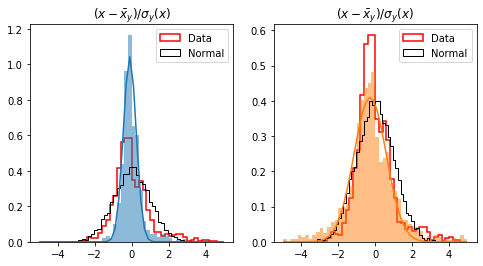

In [51]:
eta = 1 
norm = 'std'
xp = setupdata(salearrayca, casales, padl, padr)[0]
xp /= xp.std(axis=0)

plt.figure( figsize = (8, 4))
for ii, tp in enumerate([[0.03, 0.5], [pp.x[0], pp.x[1]]]):
    plt.subplot(1, 2, ii+1)
    eps, sig = tp[0], tp[1]
    lambtrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig)
    ilambtrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig,  inv=True)


    plt.hist(xp[:, padl:-padr].flatten(), alpha=1, bins=50, normed=True, range=(-5, +5), histtype='step', lw=1.5, label='Data',color='r')
    xxp, xc , means, sstd, pk, pkca = setupdatatrans(salearrayca, casales, padl, padr, trans=lambtrans, stdnorm=True)
    bins = plt.hist(xxp[:, padl:-padr].flatten(), alpha=0.5, bins=50, normed=True, range=(-5, +5), color='C%d'%ii)[1]
    tx, ty = fitgauss(xxp[:, padl:-padr].flatten(), bins=bins, normed=True)
    plt.plot(tx, ty, 'C%d'%ii)
    plt.hist(np.random.normal(size=10000), histtype='step', bins=50, normed=True, label='Normal', color='k')

    plt.legend()
    plt.title(r'$(x-\bar{x}_y)/\sigma_y(x)$', fontsize=fsize)
plt.show()


In [114]:

eta = 1 
stdnorm = True
pkt = []

for ii, tp in enumerate([[0.03, 0.5], [pp.x[0], pp.x[1]]]):
# for ii, tp in enumerate([[0.03, 0.5]]):
    eps, sig = tp[0], tp[1]
    lambtrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig)
    ilambtrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig,  inv=True)

    preds = []
    padl, padr = years.size//2, years.size//2
    # padl, padr = 0, 0

    xp, xc, means, sstd, pk, pkca = setupdatatrans(salearrayca, casales, padl, padr, trans=lambtrans, stdnorm=stdnorm, al=1.0)
    pkm = pk.mean(axis=0)
    ffpad  = getf(padl, padr)
    tfpad = gettfpriortrans(salearrayca, padl, padr, trans=lambtrans, stdnorm=stdnorm)
    pktrue = pkm/tfpad
    pkt.append(pktrue)
    p0 = np.ones(pkm.size*2)
    tomin = lambda p: chisq(p, means*0, xc, pktrue, padl, sigma=xc.std()*0.01)
    pmin = minimize(tomin, p0).x
    capredt = pred(pmin, means*0)
    cov = getcov(pktrue, padl, padr, n0=xc.std()*0.01)
    errt = cov.diagonal()**0.5

#     plt.plot(years, capredt[padl:-padr], 'C%d-'%ii,  alpha=1, lw=2)
#     plt.plot(years, (capredt+errt)[padl:-padr], 'C%d-'%ii,  alpha=0.5, lw=1)
#     plt.plot(years, (capredt-errt)[padl:-padr], 'C%d-'%ii,  alpha=0.5, lw=1)

#     plt.plot(years, xc, 'C%d:'%ii,  alpha=0.5, lw=2)
#     plt.plot(years, xp[:, padl:-padr].mean(axis=0),  'C%d--'%ii, alpha=0.5, lw=2)
    
    
    recover = lambda x: ilambtrans(x)*sstd + means
    capred = recover(capredt)
    dfdx = (recover(capredt*1.001) - recover(capredt*0.999))/(capredt*0.002)
    err = errt*dfdx

#     plt.errorbar(years, capred[padl:-padr], err[padl:-padr], alpha=0.5, lw=2, elinewidth=1)
    plt.errorbar(years, capred[padl:-padr], alpha=1, lw=2, elinewidth=1, label=ii, color='C%d'%ii)
    print('Expected difference : ', capred[padl:-padr][years==2000] - casales[years==2000])
# plt.title(' Expected difference : %.2f'%(capred[padl:-padr][years==2000] - casales[years==2000]))
    
plt.errorbar(years, capredfid[padl:-padr], errfid[padl:-padr], alpha=0.5, lw=2, elinewidth=1, marker='x', label='Fid', color='k')
plt.plot(years, casales, 'b--', lw=2, label='True sales')
plt.plot(years, meansales, 'r--', lw=2, label='National mean')
plt.grid()
plt.legend()

# plt.xlim(years[i1], years[-1])
# plt.ylim(20, 100)

NameError: name 'setupdatatrans' is not defined

[]

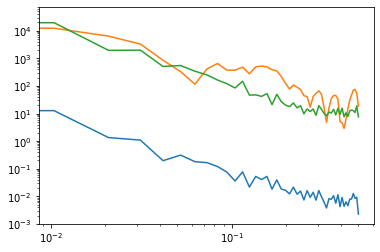

In [53]:
plt.plot(ffpad , pkt[0])
plt.plot(ffpad , pkt[1])
plt.plot(ffpad , pkfid)
plt.loglog()

In [54]:

# eta = 1 
# # for ii, tp in enumerate([[0.03, 0.5], [pp.x[0], pp.x[1]]]):
# stdnorm = True

# for ii, tp in enumerate([[0.03, 0.5]]):
#     eps, sig = tp[0], tp[1]
#     lambtrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig)
#     lambitrans = lambda z: trans(z, eps=eps, eta=eta, sig=sig,  inv=True)

#     ii = 0 
#     preds = []
#     padl, padr = years.size//2, years.size//2
#     # padl, padr = 0, 0

#     xp, means, pk, pkca, sstd = setupdatatrans(salearrayca, casales, padl, padr, trans=lambtrans, stdnorm=stdnorm)
#     pkm = pk.mean(axis=0)
#     ffpad  = getf(padl, padr)
#     tfpad = gettfprior(salearrayca, padl, padr, trans=lambtrans)
#     pktrue = pkm/tfpad

#     p0 = np.ones(pkm.size*2)
#     tomin = lambda p: chisqtrans(p, means*0, lambtrans(casales-means[padl:-padr]), pktrue, padl, sigma=1, norm=sstd)
#     pmin = minimize(tomin, p0).x
#     capredt = pred(pmin, means*0, norm=norm)
#     capred = lambitrans(capredt) + means

#     cov = getcov(pktrue, padl, padr, n0=1e-1)

#     errt = cov.diagonal()**0.5
#     dfdx = (lambitrans(capredt*1.001) - lambitrans(capredt*0.999))/(capredt*0.002)
#     err = errt*dfdx

#     # plt.errorbar(years, capred[padl:-padr], err[padl:-padr], alpha=0.5, lw=2, elinewidth=1)
#     plt.errorbar(years, capred[padl:-padr], alpha=0.5, lw=2, elinewidth=1)
#     print('Expected difference : ', capred[padl:-padr][years==2000] - casales[years==2000])
# # plt.title(' Expected difference : %.2f'%(capred[padl:-padr][years==2000] - casales[years==2000]))
    
# plt.errorbar(years, capredfid[padl:-padr], errfid[padl:-padr], alpha=0.5, lw=2, elinewidth=1, marker='x', label='Fid')
# plt.plot(years, casales, 'b--', lw=2, label='True sales')
# plt.plot(years, meansales, 'r--', lw=2, label='National mean')
# plt.grid()
# plt.legend()

# # plt.xlim(years[i1], years[-1])
# # plt.ylim(20, 100)

In [55]:
(abs(xp[xp!=0]) > 5).sum()/(xp!=0).sum()

0.07625

# YJ transform

In [93]:
import numpy as np
import sympy as sp
from sympy.utilities.autowrap import ufuncify


x_sp = sp.Symbol('x_sp', real=True)
eta_sp = sp.Symbol('eta_sp', real=True)
eps_sp = sp.Symbol('eps_sp', real=True)
beta_sp = sp.Symbol('beta_sp', positive=True)
_yj_n = 4
_sp_eps = 1e-8


def yj_nested_tool(yj_n, n, yj_1 = None):
    
    if yj_1 is None:
        yj_1 = yj_n
    
    if n == 1:
        return yj_n
    
    elif n > 1:
        return yj_nested_tool(sp.lambdify([x_sp, eps_sp], yj_1(yj_n(x_sp, eps_sp), eps_sp)), n - 1, yj_1)
    
    else:
        raise ValueError
        
        
yj_sp_p = sp.lambdify([x_sp, eps_sp], ((x_sp + 1)**(1 + eps_sp) - 1) / (1 + eps_sp), 'sympy')
yj_sp_n = sp.lambdify([x_sp, eps_sp], -((-x_sp + 1)**(1 - eps_sp) - 1) / (1 - eps_sp), 'sympy')

jy_sp_p = sp.lambdify([x_sp, eps_sp], ((1 + eps_sp) * x_sp + 1)**(1 / (1 + eps_sp)) - 1, 'sympy')
jy_sp_n = sp.lambdify([x_sp, eps_sp], -(-(1 - eps_sp) * x_sp + 1)**(1 / (1 - eps_sp)) + 1, 'sympy')

sa_sp_p = sp.lambdify([x_sp, eta_sp], sp.sinh(eta_sp * x_sp) / eta_sp, 'sympy')
sa_sp_o = sp.lambdify([x_sp, eta_sp], x_sp, 'sympy')
sa_sp_n = sp.lambdify([x_sp, eta_sp], sp.asinh(eta_sp * x_sp) / eta_sp, 'sympy')

_to_gauss = ufuncify(args = [x_sp, eta_sp, eps_sp, beta_sp],
                     expr = sp.Piecewise((sa_sp_o(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp >= 0)),
                                         (sa_sp_o(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp < 0)),
                                         (sa_sp_p(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp > 0, x_sp >= 0)),
                                         (sa_sp_p(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp > 0, x_sp < 0)),
                                         (sa_sp_n(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp < 0, x_sp >= 0)),
                                         (sa_sp_n(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, sp.And(eta_sp < 0, x_sp < 0)),
                                         (sp.nan, True)),
                     backend='cython')
#                      backend='numpy')

_to_gauss_g = ufuncify(args = [x_sp, eta_sp, eps_sp, beta_sp],
                     expr = sp.Piecewise((sp.diff(sa_sp_o(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp >= 0)),
                                         (sp.diff(sa_sp_o(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp < 0)),
                                         (sp.diff(sa_sp_p(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp > 0, x_sp >= 0)),
                                         (sp.diff(sa_sp_p(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp > 0, x_sp < 0)),
                                         (sp.diff(sa_sp_n(yj_nested_tool(yj_sp_p, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp < 0, x_sp >= 0)),
                                         (sp.diff(sa_sp_n(yj_nested_tool(yj_sp_n, _yj_n)(x_sp / beta_sp, eps_sp), eta_sp) * beta_sp, x_sp, 1), sp.And(eta_sp < 0, x_sp < 0)),
                                         (sp.nan, True)),
                     backend='cython')
#                      backend='numpy')

_from_gauss = ufuncify(args = [x_sp, eta_sp, eps_sp, beta_sp],
                     expr = sp.Piecewise((yj_nested_tool(jy_sp_p, _yj_n)(sa_sp_o(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp >= 0)),
                                         (yj_nested_tool(jy_sp_n, _yj_n)(sa_sp_o(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp > -_sp_eps, eta_sp < _sp_eps, x_sp < 0)),
                                         (yj_nested_tool(jy_sp_p, _yj_n)(sa_sp_n(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp > 0, x_sp >= 0)),
                                         (yj_nested_tool(jy_sp_n, _yj_n)(sa_sp_n(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp > 0, x_sp < 0)),
                                         (yj_nested_tool(jy_sp_p, _yj_n)(sa_sp_p(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp < 0, x_sp >= 0)),
                                         (yj_nested_tool(jy_sp_n, _yj_n)(sa_sp_p(x_sp / beta_sp, eta_sp), eps_sp) * beta_sp, sp.And(eta_sp < 0, x_sp < 0)),
                                         (sp.nan, True)),
                     backend='cython')
#                      backend='numpy')


def nl_vectorizer(fun):
    
    def fun_v(zz, nl):
        
        zz = np.atleast_1d(zz)
        nl = np.asarray(nl)
        
        if nl.shape[-1] == 2:
            
            nl = np.concatenate((nl, np.ones((*nl.shape[:-1], 1))), axis=-1)  # set default value of beta to 1
        
        if zz.ndim == 1 and nl.ndim == 1 and nl.shape[-1] == 3: # case I: zz is a bunch of the same variable, with the same NL parameter
                                                                # that is, zz is (# of samples,), nl is (3,)
            
            _x_sp = zz
            _eta_sp = np.tile(nl[0], zz.shape[0])
            _eps_sp = np.tile(nl[1], zz.shape[0])
            _beta_sp = np.tile(nl[2], zz.shape[0])
            _results = fun(_x_sp, _eta_sp, _eps_sp, _beta_sp)
            return _results
        
        elif zz.ndim == 2 and nl.ndim == 2 and nl.shape[-1] == 3: # case II: zz is (# of samples, # of dim), nl is (# of dim, 3)
            
            _x_sp = zz.flatten()
            _eta_sp = np.tile(nl[:, 0], zz.shape[0])
            _eps_sp = np.tile(nl[:, 1], zz.shape[0])
            _beta_sp = np.tile(nl[:, 2], zz.shape[0])
            _results = fun(_x_sp, _eta_sp, _eps_sp, _beta_sp).reshape(zz.shape)
            return _results
        
        elif zz.ndim == 1 and nl.ndim == 2 and zz.shape[0] == nl.shape[0] and nl.shape[-1] == 3:
            # case III: zz is one single multidimensional sample, with different NL parameters in each dim
            # that is, zz is (# of dim,), nl is (# of dim, 3)
            
            _x_sp = zz
            _eta_sp = np.copy(nl[:, 0])
            _eps_sp = np.copy(nl[:, 1])
            _beta_sp = np.copy(nl[:, 2])
            _results = fun(_x_sp, _eta_sp, _eps_sp, _beta_sp)
            
            return _results
        
        else:
            
            raise ValueError
            
    return fun_v


to_gauss = nl_vectorizer(_to_gauss)
to_gauss_g = nl_vectorizer(_to_gauss_g)
from_gauss = nl_vectorizer(_from_gauss)


def norm_logpdf(x, mean, hess, normalized=False):
    
    result = -0.5 * (x - mean) * hess * (x - mean)
    if normalized:
        result += 0.5 * np.log(hess) - 0.5 * np.log(2 * np.pi)
    return result

def log_q(xx, mean, hess, nl, normalized=False):
    
    yy = to_gauss(xx - mean, nl)
    return (norm_logpdf(yy, np.zeros_like(mean), hess, normalized) + np.log(np.abs(to_gauss_g(xx - mean, nl)))).reshape(xx.shape)


In [94]:
from scipy.optimize import curve_fit as cf
from scipy.optimize import minimize
from scipy.stats import skew, kurtosis

def gauss(x, a, mu, s):
# def gauss(x, p):
#     a, mu, s = p
    norm = 1/np.sqrt(2*np.pi*s**2)
#     norm = 1
    return a*norm*np.exp(-0.5*((x-mu)/s)**2)

def fitgauss(xx, bins, normed):
    h, x = np.histogram(xx, bins=bins, normed=normed)
    x = x[1:] + x[:-1]
    x /= 2 
    p0 = [h.max(), xx.mean(), xx.std()]
    ftomin = lambda p: ((gauss(x, *p) - h)**2).sum()
    pp = minimize(ftomin, p0, method='Nelder-Mead', options={'maxiter':5000})
    print('mu=%.2f, s=%.2f'%(pp.x[1],pp.x[2]))
#     pp = cf(gauss, x, h, p0, )[0]
    return (x, gauss(x, *pp.x))

In [95]:
# @interact(mu=(-3,3,0.01), sig=(0.01,40,0.01), eta=(-2,2,0.01), eps=(-2,2,0.01), beta=(-10,10,0.01))
@interact(mu=(-3,3,0.01), sig=(0.01,3,0.01), eta=(-1,1,0.01), eps=(-1,1,0.01), beta=(-10,10,0.01))
def foo(mu, sig, eta, eps, beta):
    xx = np.linspace(-5,5,1000)
    plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)))

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0, step=0.01), FloatSlider(valu…

In [96]:
xxp = np.random.lognormal(1.6, .5, 1000000)
print(xxp.min(), xxp.max())

xxp = np.random.lognormal(1.6, .5, 10000)
print(xxp.min(), xxp.max())

0.48483085135408377 62.77857163414367
0.6600196161313411 27.697419883568703


In [97]:
xxp = np.random.lognormal(1.6, .5, 1000000)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


[ 4.90886073  2.46821426  0.51696196 -0.19235962  2.98837813]


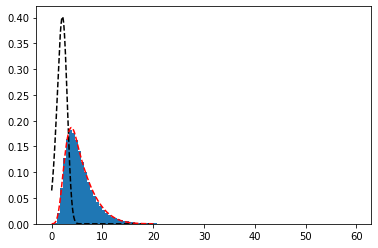

[ 4.90886295  2.46822476  0.51697847 -0.19235919  2.98837813]


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


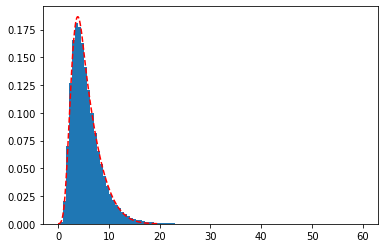

[ 4.88400764e+00  2.41595847e+00  5.94423485e-09 -2.00775236e-01
  2.98837813e+00]


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


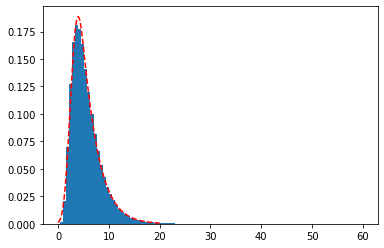

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


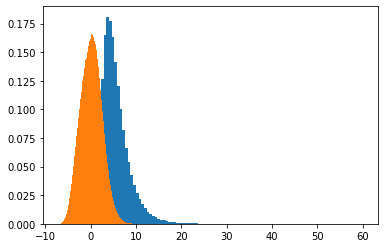

In [98]:
xxp = np.random.lognormal(1.6, .5, 1000000)

dy, dx = np.histogram(xxp, bins=1000, normed=True)
dx = 0.5*(dx[1:]+dx[:-1])

plt.hist(xxp, bins=100, normed=True);
xx = np.linspace(0,20,1000)
mu, sig, eta, eps, beta = 2., 1., -1., 0.6, 20
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='k', ls='--')

def tomin(p, rety = False):
    mu, sig, eta, eps, beta = p
    beta = xxp.std()
    if abs(eps) > 1: return 1e10
    yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
    if rety: return yy
    return sum((yy-dy)**2) 
    
# p0 = [2., 1., -1., 0.6, 20]
p0 = [xxp.mean(), xxp.std(), -.5, 0.1, xxp.std()]
# p0 = [2., 1., 0.1, 0.1, 10]
# pp = minimize(tomin, p0, method='Nelder-Mead')
pp = minimize(tomin, p0)
print(pp.x)
mu, sig, eta, eps, beta = pp.x
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='r', ls='--')
plt.show()

# p0 = [2., 1., -1., 0.6, 20]
p0 = [xxp.mean(), xxp.std(), -.5, 0.5, xxp.std()]
# p0 = [2., 1., 0.1, 0.1, 10]
# pp = minimize(tomin, p0, method='Nelder-Mead')
pp = minimize(tomin, p0)
print(pp.x)
mu, sig, eta, eps, beta = pp.x
plt.hist(xxp, bins=100, normed=True);
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='r', ls='--')
plt.show()

# p0 = [2., 1., -1., 0.6, 20]
p0 = [xxp.mean(), xxp.std(), 0., 0., xxp.std()]
# p0 = [2., 1., 0.1, 0.1, 10]
# pp = minimize(tomin, p0, method='Nelder-Mead')
pp = minimize(tomin, p0)
print(pp.x)
mu, sig, eta, eps, beta = pp.x
plt.hist(xxp, bins=100, normed=True);
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='r', ls='--')
plt.show()

plt.hist(xxp, bins=100, normed=True)
plt.hist(to_gauss(xxp - mu, [eta, eps, beta]), bins=100, normed=True)
plt.show()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


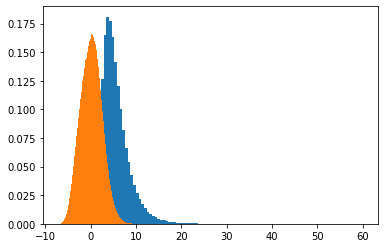

In [99]:
plt.hist(xxp, bins=100, normed=True)
plt.hist(to_gauss(xxp - mu, [eta, eps, beta]), bins=100, normed=True)
plt.show()

mu=-0.00, s=-1.57


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]


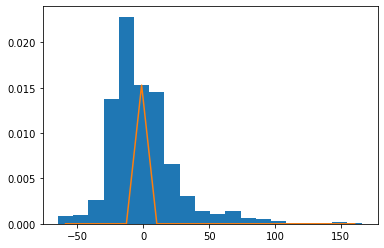

In [100]:
# dd = (salearray - salearray.mean(axis=0))
dd = (salearrayskip - salearrayskip.mean(axis=0))
# dd /= salearrayca.std(axis=0)
dd = dd.flatten()
plt.hist(dd, bins=20, normed=True)
tx, ty = fitgauss(dd, bins=20, normed=True)
plt.plot(tx, ty)
plt.show()

In [101]:
eta, eps, beta=1., 1., 1.
to_gauss(np.linspace(-1,1,100).astype(np.float64),  0.5*np.array([eta, eps, beta]).astype(np.float64));

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


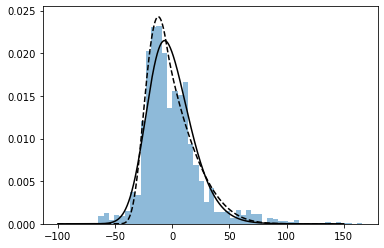

In [102]:
# start from a 1-d Gaussian N(mu, sig^2), transform it with (eta, eps, beta) and plot the transformed pdf. Here the rescaling factor is exp(beta) so it's always positive.
dd = (salearrayskip - salearrayskip.mean(axis=0)).flatten()
plt.hist(dd, bins=50, normed=True, alpha=0.5)
# plt.hist(dd, bins=30, normed=True, alpha=0.5)
# plt.hist(dd, bins=20, normed=True, alpha=0.5)
# plt.hist(dd, bins=50, normed=True, histtype='step')
# plt.hist(dd, bins=30, normed=True, histtype='step')
# plt.hist(dd, bins=20, normed=True, histtype='step')

xx = np.linspace(-100,150,10000)
mu, sig, eta, eps, beta = -5, 19., .2, -0.1, 10.
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='k', ls='--')
mu, sig, eta, eps, beta = -3., 19., -0.3, -0.12, 40.
plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='k')
# mu, sig, eta, eps, beta = 0, 19, 0, 0, 10.
# plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)), color='r')

### Transform data

In [116]:
statesales = {}
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')
    statesales[s] = sales[loc]['Data_Value'].values.astype('float32')

ss = 'CA'
tmp = statesales['CA'].copy() 
statesales['CA'] = statesales[ss].copy()
statesales[ss] = tmp.copy()

salearray = np.zeros((len(ils), years.size))
for i in range(len(statesid)): salearray[i] = statesales[ils[i]]
    
# salearrayca = []
# for i in range(len(statesid)):
#     if ils[i] == 'CA': continue
#     else: salearrayca.append(statesales[ils[i]])
# salearrayca = np.array(salearrayca)

salearrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: salearrayskip.append(statesales[ils[i]])
salearrayskip = np.array(salearrayskip)
salearrayca = salearrayskip

casales = statesales['CA']
meansales = salearrayca.mean(axis=0)
meansalesskip = salearrayskip.mean(axis=0)

i1 = 18
yy = years.size



/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


[-5.16437761 19.10927648 -0.03153884 -0.0373898   2.45560204]


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


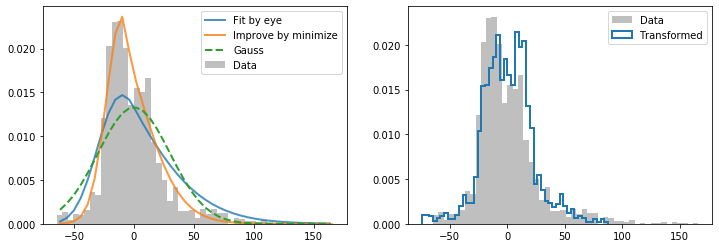

In [117]:
##Minimize 

# tdata = salearray.copy()
tdata = salearrayca.copy()
dd = (tdata - tdata.mean(axis=0)).flatten()
# ddy, ddx = np.histogram(dd, bins=50, normed=True, range=[-100, 100])
ddy, ddx = np.histogram(dd, bins=40, normed=True)
ddx = (ddx[1:] + ddx[:-1])*0.5
ddx = ddx.astype('float64')
ddy2, ddx2 = np.histogram(dd, bins=20, normed=True)
ddx2 = (ddx2[1:] + ddx2[:-1])*0.5
ddx2 = ddx2.astype('float64')


def tomin(p, rety = False, fitbeta=True):
    mu, sig, eta, eps, beta = p
    if not fitbeta : beta = dd.std()
    yy = np.exp(log_q(ddx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
    yy2 = np.exp(log_q(ddx2, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
    if rety: return yy
    return sum((yy-ddy)**2) + sum((yy2-ddy2)**2) #+ skew(dzt)/2. + kurtosis(dzt)/2.
    
    
p0 = [0., 30., 0.01, -.1, 20.]
pinit = p0
# pp = minimize(tomin, pinit, method='Nelder-Mead', options={'maxiter': 10000, 'maxfev':20000, 'xatol': 1e-7, 'fatol': 1e-7, "maxfev":10000, 'ftol':1e-10, 'rtol':1e-10})
ppnl = minimize(tomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
print(ppnl.x)

# p0 = [dd.mean(), dd.std(), 0., 0., dd.std()]
# pinit = p0
# ppnl = minimize(lambda x: tomin(x, fitbeta=False), pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# print(ppnl.x)

mu, sig, eta, eps, beta = ppnl.x
nl = np.array([eta, eps, beta])
yy = to_gauss((dd.astype('float64') - mu), nl)
yyl = to_gauss((dd.astype('float64') - mu), [0.,0.,1.]) 
yysalearrayca = yy.reshape(tdata.shape[0], -1)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.hist(dd, bins=50, normed=True, label='Data', alpha=0.5, color='gray')
plt.plot(ddx, tomin(p0, rety=True), label='Fit by eye', lw=2, alpha=0.8)
plt.plot(ddx, tomin(ppnl.x, rety=True), label='Improve by minimize', lw=2, alpha=0.8)
plt.plot(ddx, tomin([p0[0], p0[1], 0., 0., 1.], rety=True), '--', lw=2, label='Gauss')
plt.legend()

plt.subplot(122)
plt.hist(dd, bins=50, normed=True, label='Data', alpha=0.5, color='gray')
plt.hist(yy, bins=50, normed=True, histtype='step', label='Transformed', lw=2)
# plt.hist(dd, bins=50, normed=True, label=r'Data',  color='gray', alpha=0.5)
# plt.hist(np.random.normal(mu, 1/sig, size=1000), bins=50, normed=True, histtype='step', label='Data/sig**2')
plt.legend()
# plt.yscale('log')
plt.show()

In [118]:
ppnl


      fun: 7.688256399434058e-05
 hess_inv: array([[ 1.05388573e+08,  2.16652551e+08, -2.06181860e+07,
        -5.05361481e+07,  6.99457154e+09],
       [ 2.16652551e+08,  4.45474754e+08, -4.23974162e+07,
        -1.03917958e+08,  1.43831761e+10],
       [-2.06181860e+07, -4.23974162e+07,  4.03693175e+06,
         9.89185760e+06, -1.36909938e+09],
       [-5.05361481e+07, -1.03917958e+08,  9.89185760e+06,
         2.42442209e+07, -3.35562352e+09],
       [ 6.99457154e+09,  1.43831761e+10, -1.36909938e+09,
        -3.35562352e+09,  4.64450244e+11]])
      jac: array([ 1.31050001e-05, -4.97129804e-06, -9.52208211e-05,  5.23763811e-04,
        3.52447387e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1278
      nit: 137
     njev: 181
   status: 2
  success: False
        x: array([-5.16437761, 19.10927648, -0.03153884, -0.0373898 ,  2.45560204])

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]


mu=-0.00, s=-20.30
mu=-0.72, s=-18.74


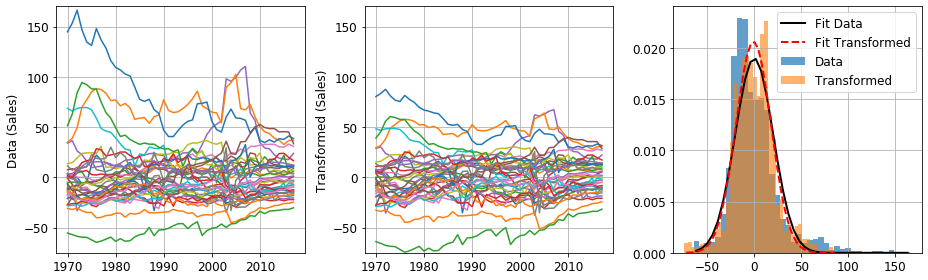

In [119]:
# ##Minimize 

# dd = (salearrayca - salearrayca.mean(axis=0)).flatten()
# # ddy, ddx = np.histogram(dd, bins=50, normed=True, range=[-100, 100])
# ddy, ddx = np.histogram(dd, bins=50, normed=True)
# ddx = (ddx[1:] + ddx[:-1])*0.5
# ddx = ddx.astype('float64')


fig, ax = plt.subplots(1, 3, figsize = (13, 4))
fsize=12

axis = ax[0]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, (salearrayskip-salearrayskip.mean(axis=0))[i])
axis.set_ylabel('Data (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)

axis = ax[1]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, yysalearrayca[i])
axis.set_ylabel('Transformed (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)

axis = ax[2]
bins, normed = 40, True
axis.hist(dd, bins=bins, normed=normed, label='Data', alpha=0.7, color='C0')
axis.hist(yy, bins=bins, normed=normed,  label='Transformed', alpha=0.6, color='C1')
axis.plot(*fitgauss(dd, bins, normed), 'k', lw=2, label='Fit Data')
axis.plot(*fitgauss(yy, bins, normed), 'r--', lw=2, label='Fit Transformed')
axis.legend(fontsize=fsize)

for axis in ax.flatten():
    axis.grid()
    axis.tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
    

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


mu=-0.00, s=-20.30
mu=-0.72, s=-18.74


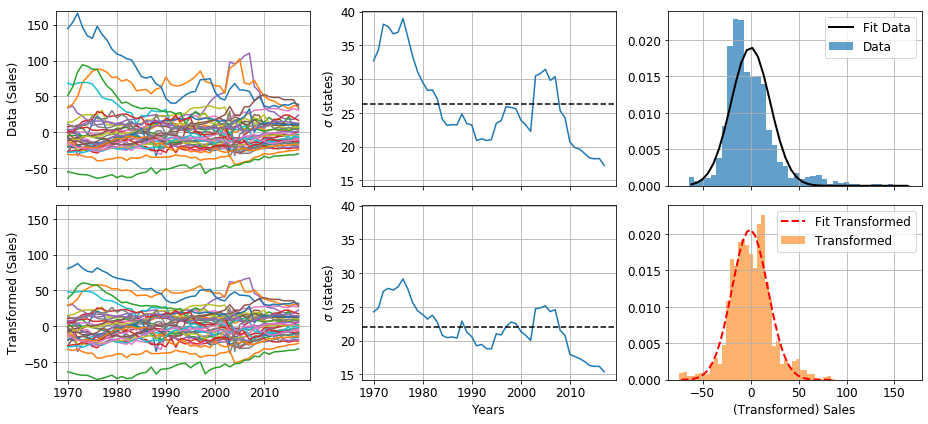

In [120]:
# ##Minimize 

# dd = (salearrayca - salearrayca.mean(axis=0)).flatten()
# # ddy, ddx = np.histogram(dd, bins=50, normed=True, range=[-100, 100])
# ddy, ddx = np.histogram(dd, bins=50, normed=True)
# ddx = (ddx[1:] + ddx[:-1])*0.5
# ddx = ddx.astype('float64')


fig, axar = plt.subplots(2, 3, figsize = (13, 6), sharex='col', sharey='col')
fsize=12

axis = axar[0, 0]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, (salearrayskip-salearrayskip.mean(axis=0))[i])
axis.set_ylabel('Data (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)

ssize = salearrayskip.shape[0]
bootstd = np.zeros_like(salearrayskip)
for i in range(ssize):
    tmp = np.array([salearrayskip[j] for j in range(ssize) if j!=i])
    bootstd[i] = tmp.std(axis=0)
bootstd = bootstd.std(axis=0)
# axar[0, 1].errorbar(years, salearrayskip.std(axis=0), bootstd)
axar[0, 1].plot(years, salearrayskip.std(axis=0))
axar[0, 1].axhline(salearrayskip.std(axis=0).mean(), color='k', ls="--")
axar[0, 1].set_ylabel('$\sigma$ (states)', fontsize=fsize)


axis = axar[1, 0]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, yysalearrayca[i])
axis.set_ylabel('Transformed (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)
axar[1, 0].set_xlabel('Years', fontsize=fsize)

ssize = salearrayskip.shape[0]
bootstd = np.zeros_like(salearrayskip)
for i in range(ssize):
    tmp = np.array([yysalearrayca[j] for j in range(ssize) if j!=i])
    bootstd[i] = tmp.std(axis=0)
bootstd = bootstd.std(axis=0)
# axar[1, 1].errorbar(years, yysalearrayca.std(axis=0), bootstd)
axar[1, 1].plot(years, yysalearrayca.std(axis=0))
axar[1, 1].axhline(yysalearrayca.std(axis=0).mean(), color='k', ls="--")
axar[1, 1].set_ylabel('$\sigma$ (states)', fontsize=fsize)
axar[1, 1].set_xlabel('Years', fontsize=fsize)

axis = axar[0, 2]
bins, normed = 40, True
axis.hist(dd, bins=bins, normed=normed, label='Data', alpha=0.7, color='C0')
axis.plot(*fitgauss(dd, bins, normed), 'k', lw=2, label='Fit Data')
axis.legend(fontsize=fsize)

axis = axar[1, 2]
axis.hist(yy, bins=bins, normed=normed,  label='Transformed', alpha=0.6, color='C1')
axis.plot(*fitgauss(yy, bins, normed), 'r--', lw=2, label='Fit Transformed')
axis.legend(fontsize=fsize)
axis.set_xlabel('(Transformed) Sales', fontsize=fsize)

for axis in axar.flatten():
    axis.grid()
    axis.tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
    

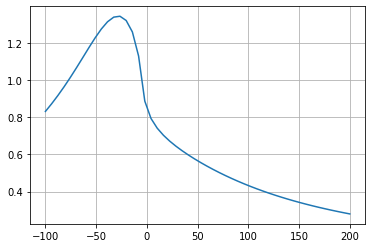

In [121]:

xx = np.linspace(-100, 200)
jac = np.abs(to_gauss_g(xx - mu, nl))
plt.plot(xx, jac)
# plt.plot(x, y, '.')
plt.grid()
plt.show()


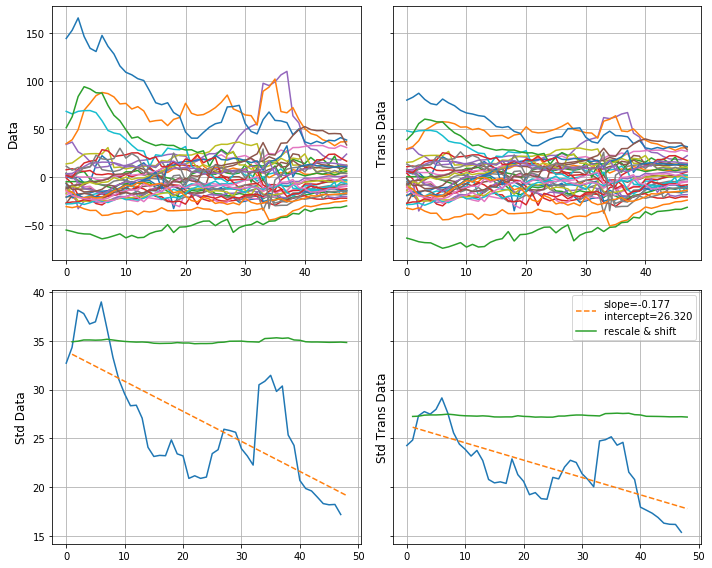

In [122]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8), sharey='row')
fsize=12

axis = ax[0,0]
for i in range(salearrayca.shape[0]):
    axis.plot((salearrayca-salearrayca.mean(axis=0))[i])
axis.set_ylabel('Data', fontsize=fsize)

axis = ax[0,1]
for i in range(salearrayca.shape[0]):
    axis.plot(yysalearrayca[i])
axis.set_ylabel('Trans Data', fontsize=fsize)

axis = ax[1,0]
axis.plot(salearrayca.std(axis=0))
iy=np.arange(1, salearrayca.std(axis=0).size+1, 1)
lfit = np.polyfit(iy, salearrayca.std(axis=0), 1)
axis.plot(iy, iy*lfit[0]+lfit[1], '--', label='slope=%0.3f\nintercept=%.3f'%(lfit[0], lfit[1]))
axis.plot(iy, (salearrayca/(iy*lfit[0]+lfit[1])).std(axis=0) + lfit[1], '-', label='rescale & shift')
axis.set_ylabel('Std Data', fontsize=fsize)

axis = ax[1, 1]
axis.plot(yysalearrayca.std(axis=0))
axis.set_ylabel('Std Trans Data', fontsize=fsize)
iy=np.arange(1, yysalearrayca.std(axis=0).size+1, 1)
lfit = np.polyfit(iy, yysalearrayca.std(axis=0), 1)
axis.plot(iy, iy*lfit[0]+lfit[1], '--', label='slope=%0.3f\nintercept=%.3f'%(lfit[0], lfit[1]))
axis.plot(iy, (yysalearrayca/(iy*lfit[0]+lfit[1])).std(axis=0) + lfit[1], '-', label='rescale & shift')
axis.legend()

for axis in ax.flatten():axis.grid()
plt.tight_layout()

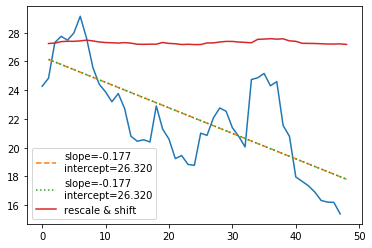

In [123]:
from scipy.optimize import curve_fit as cf
iy=np.arange(1, yysalearrayca.std(axis=0).size+1, 1)
lfit = np.polyfit(iy, yysalearrayca.std(axis=0), 1)


# def tmptomin(p):
#     m = p[1] + p[0] * iy
#     return sum(m-yysalearrayca.std(axis=0))**2
# tp = minimize(tmptomin,  [0.6, 20])
def tmptomin(iy, p0, p1):
    m = p1 + p0 * iy
    return m
tpp = cf(tmptomin, iy, yysalearrayca.std(axis=0), [0.6, 20])
tp = tpp[0]
plt.plot(yysalearrayca.std(axis=0))
plt.plot(iy, iy*lfit[0]+lfit[1], '--', label='slope=%0.3f\nintercept=%.3f'%(lfit[0], lfit[1]))
# plt.plot(iy, iy*tp.x[0]+tp.x[1], ':', label='slope=%0.3f\nintercept=%.3f'%(tp.x[0], tp.x[1]))
plt.plot(iy, iy*tp[0]+tp[1], ':', label='slope=%0.3f\nintercept=%.3f'%(tp[0], tp[1]))
plt.plot(iy, (yysalearrayca/(iy*lfit[0]+lfit[1])).std(axis=0) + lfit[1], '-', label='rescale & shift')
plt.legend()



## predict

p0 = [0., 30, 0.01, -.1, 20.]
It seems to be sensitive to this starting point for some reason

In [124]:
statesales = {}
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')
    statesales[s] = sales[loc]['Data_Value'].values.astype('float32')

ss = 'CA'
tmp = statesales['CA'].copy() 
statesales['CA'] = statesales[ss].copy()
statesales[ss] = tmp.copy()

salearray = np.zeros((len(ils), years.size))
for i in range(len(statesid)): salearray[i] = statesales[ils[i]]
    

salearrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: salearrayskip.append(statesales[ils[i]])
salearrayskip = np.array(salearrayskip)
salearrayca = salearrayskip

casales = statesales['CA']
meansales = salearrayca.mean(axis=0)
meansalesskip = salearrayskip.mean(axis=0)

i1 = 18
yy = years.size



In [125]:
meansalesca = salearrayca.mean(axis=0)
dd = (salearrayca - meansalesca)
# dd /= dd.std(axis=0)
dd = dd.flatten()

# dd = (salearray - salearray.mean(axis=0)).flatten()
ddx, ddy = [], []
for bins in [20,  40]:
    ty, tx = np.histogram(dd, bins=bins, normed=True)
    ddx.append(((tx[1:] + tx[:-1])*0.5).astype('float64'))
    ddy.append(ty)


def tomin(p, rety = False, nd=0, fitbeta=True):
    mu, sig, eta, eps, beta = p
    if not fitbeta: beta = dd.std()
    if rety: 
        yy = np.exp(log_q(ddx[nd], np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
        return yy
    else:
        toret = 0
        if sig < 0: return 1e10
        for idd, dx in enumerate(ddx):
            yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
            toret += sum((yy - ddy[idd])**2)
        return toret
    
    
p0 = [0., 30, 0.01, -.1, 20.]
pinit = p0
# ppnl2 = minimize(tomin, pinit, method='Nelder-Mead', options={"maxfev":10000, 'ftol':1e-10, 'rtol':1e-10})
ppnl = minimize(tomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
print(ppnl.x)
ppnl1 = ppnl.copy()

# p0 = [dd.mean(), dd.std(), 0, 0, dd.std()]
# pinit = p0
# ppnl = minimize(lambda x: tomin(x, fitbeta=False), pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# print(ppnl.x)

# ppnl = minimize(tomin, ppnl.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# print(ppnl.x)
# ppnl = minimize(tomin, ppnl.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# print(ppnl.x)


del dd
####################################


padl, padr = years.size, years.size
mu, sig, eta, eps, beta = ppnl.x
nl = np.array([eta, eps, beta])
# xpg = salearrayca-salearrayca.mean(axis=0)
xp = (salearrayca - meansalesca).flatten()
xpg = to_gauss((xp.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
xc = casales - meansalesca
xcg = to_gauss((xc.astype('float64') - mu), nl)




###
xpgpad = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
ff = np.fft.rfftfreq(xpgpad[0].size)
pk = []
for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
pk = np.array(pk)
pkm = pk.mean(axis=0)
tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
pkprior = pkm/tfpad
cov = getcov(pkprior, padl, padr)
errg = cov.diagonal()**0.5

pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))



/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


[-5.16437761 19.10927648 -0.03153884 -0.0373898   2.45560204]


NameError: name 'psfunc' is not defined

In [ ]:
xpg1 = to_gauss((xp.astype('float64') - ppnl1['x'][0]), ppnl1['x'][2:]).reshape(salearrayca.shape[0], -1)



In [ ]:
ppnl.x, ppnl1['x']

In [ ]:
# ##Minimize 


fig, ax = plt.subplots(1, 3, figsize = (13, 4))
fsize=12

axis = ax[0]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, (salearrayskip-salearrayskip.mean(axis=0))[i])
axis.set_ylabel('Data (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)

axis = ax[1]
for i in range(salearrayskip.shape[0]):
    axis.plot(years, xpg[i], 'C%d'%(i%9))
    axis.plot(years, xpg1[i], 'C%d--'%(i%9))
axis.set_ylabel('Transformed (Sales)', fontsize=fsize)
axis.set_ylim(-75, 170)


axis = ax[2]
bins, normed = 40, True
# axis.hist(xp.flatten(), bins=bins, normed=normed, label='Data', alpha=0.7, color='C0')
axis.hist(xpg.flatten(), bins=bins, normed=normed,  label='Transformed', alpha=0.6, color='C1')
axis.hist(xpg1.flatten(), bins=bins, normed=normed,  label='Transformed', alpha=0.4, color='C2')
# axis.plot(*fitgauss(xp.flatten(), bins, normed), 'k', lw=2, label='Fit Data')
# axis.plot(*fitgauss(xpg.flatten(), bins, normed), 'r--', lw=2, label='Fit Transformed')
axis.legend(fontsize=fsize)

for axis in ax.flatten():
    axis.grid()
    axis.tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
    

In [ ]:

def chisq2(p, cadata, priork=1, padl=0, sigma=1, i1=18,verbose=False, pred=False):
    u, v = p[:p.size//2], p[p.size//2:]
    s = u + 1j*v
    x = np.fft.irfft(s, norm='ortho')
    ps = abs(s)**2
    if pred: return x
    res = (x[padl:padl+i1] - cadata[:i1])**2 / sigma**2
    prior = ps/priork 
    if verbose: print(sum(res), sum(prior))
    return sum(res) + sum(prior)

p0 = np.ones(pkm.size*2)
tomin = lambda p: chisq2(p, xcg, pkprior, padl=padl, sigma=0.01)
pp = minimize(tomin, p0).x

In [ ]:
capredg = chisq2(pp, 0, pred=True)
deriv = (from_gauss(capredg*1.01, nl) - from_gauss(capredg*0.99, nl))/(capredg*0.02)
err = (errg*deriv)[padl:-padr]
capredup = from_gauss(capredg+errg, nl)[padl:-padr] + mu + meansalesca
capreddn = from_gauss(capredg-errg, nl)[padl:-padr]+ mu + meansalesca
capred = from_gauss(capredg, nl)[padl:-padr]+mu + meansalesca
casalesg = to_gauss(casales.astype('float64')-meansalesca-mu, nl)

In [ ]:
fsize = 13
plt.figure(figsize = (6.5, 4))

plt.errorbar(years, capred, err, color='C0', label='Gauss\nPrediction', lw=2, elinewidth=2)
plt.errorbar(years, capredfid, errfid, color='C1', elinewidth=1, label='Fiducial\nPrediction', lw=2)
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansales, 'C4--', alpha=1, lw=2, label='National Mean')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize)
plt.ylabel('Sales', fontsize=fsize)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)

In [ ]:
fsize = 12
plt.figure(figsize = (10, 4))
plt.subplot(121)

plt.errorbar(years, capred, err, color='k', label='Gauss Prediction')
plt.errorbar(years, capredfid, errfid, elinewidth=0.5, label='Fiducial Pred')
plt.plot(years, casales, '--', alpha=0.5, lw=3, label='True Sales')
plt.plot(years, meansales, '--', label='Mean Sales')
plt.legend()
plt.xlabel('years', fontsize=fsize)
plt.ylabel('CA sales', fontsize=fsize)

plt.subplot(122)
#Chi sq in Data space. Wrong
# covpred = cov[padl+i1:-padr, padl+i1:-padr]
# icovpred = np.linalg.inv(covpred)
# mod = lambda al: capred[i1:] + al*(casales[i1:] - capred[i1:])
# sig = lambda al: np.dot(np.dot(mod(al)-casales[i1:], icovpred), mod(al)-casales[i1:])
# alpha = np.linspace(0, 1, 20)
# for ia in range(alpha.size):
#     plt.plot(alpha[ia], sig(alpha[ia]), 'o')
    
#Fiducial    
covpred = covfid[i1:, i1:]
icovpred = np.linalg.inv(covpred)
mod = lambda al: capredfid[i1:] + al*(casales[i1:] - capredfid[i1:])
sig = lambda al: np.dot(np.dot(mod(al)-casales[i1:], icovpred), mod(al)-casales[i1:])
alpha = np.linspace(0, 1, 20)
for ia in range(alpha.size):
    plt.plot(alpha[ia], sig(alpha[ia]), 'x')

#Chi sq in Gaussian
capredg = chisq2(pp, 0, pred=True)[padl:-padr]
covpred = cov[padl+i1:-padr, padl+i1:-padr]
icovpred = np.linalg.inv(covpred)
mod = lambda al: capredg[i1:] + al*(casalesg[i1:] - capredg[i1:])
sig = lambda al: np.dot(np.dot(mod(al)-xcg[i1:], icovpred), mod(al)-xcg[i1:])
alpha = np.linspace(0, 1, 20)
for ia in range(alpha.size):
    plt.plot(alpha[ia], sig(alpha[ia]), '*')
    
plt.xlabel(r'$\alpha$', fontsize=fsize)
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.show()


In [ ]:
capred0, capredg0, icovpred0, covpred0 = capred.copy(), capredg.copy(), icovpred.copy(), covpred.copy()

## Check distribution of Fourier modes

In [ ]:
modes = np.fft.rfft(xpg, norm='ortho')
camodes = np.fft.rfft(xcg, norm='ortho')

pkcanopad = (abs(camodes)**2 )
pknopad = (abs(modes)**2 ).mean(axis=0)
pkscaling = (pknopad/2)**0.5
# pkscaling = (pknopad)**0.5

plt.plot(abs(modes.real.T)/pkscaling.reshape(-1,1), alpha=0.3);
plt.plot(abs(camodes.real)/pkscaling, 'k', lw=2)
for ii in [1, 10, 20, 30]:
    plt.plot(abs(modes.real[ii])/pkscaling, lw=2)
plt.show()

plt.plot(abs(modes.imag.T)/pkscaling.reshape(-1,1), alpha=0.32);
plt.plot(abs(camodes.imag)/pkscaling, 'k', lw=2)
for ii in [1, 10, 20, 30]:
    plt.plot(abs(modes.imag[ii])/pkscaling, lw=2)
# plt.plot(pkcanopad/pknopad, 'k--')
plt.show()

In [ ]:
bins = 20
plt.hist((modes.real/pkscaling).flatten(), normed=True, histtype='step', lw=3, bins=bins)
tx, ty = fitgauss((modes.real/pkscaling).flatten(), bins=bins, normed=normed)
plt.hist((modes.imag/pkscaling).flatten(), normed=True, histtype='step', lw=3, bins=bins)
tx, ty = fitgauss((modes.imag/pkscaling).flatten(), bins=bins, normed=normed)
plt.plot(tx, ty)


In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 5, 1)
plt.hist((modes.real/pkscaling).flatten(), normed=True, histtype='step', lw=3)
plt.hist((camodes.real/pkscaling).flatten(), normed=True, alpha=0.8, color='gray')
plt.ylim(0,1)
for i, ii in enumerate([1, 10, 20, 30]):
    plt.subplot(1, 5, i+2)
    plt.hist((modes.real/pkscaling).flatten(), normed=True, histtype='step', lw=3)
    plt.hist((modes[ii].real/pkscaling).flatten(), normed=True, alpha=0.5)
    plt.ylim(0,1)

### 1D analysis with jac

In [ ]:
mod = lambda al: capred + al*(casales - capred)
def jacfunc(al):
    y = (mod(al) - meansalesca)[i1:]
    jac =  np.abs(to_gauss_g(y-mu, nl))
    return y, jac

xx = np.linspace(-100, 200)
jac = np.abs(to_gauss_g(xx - mu, nl))
plt.plot(xx, jac)
plt.plot(*jacfunc(1), 'b.')
plt.plot(*jacfunc(0), 'r.')
# plt.plot(x, y, '.')
plt.grid()

In [ ]:
covfid.shape

In [ ]:
alpha = np.linspace(0, 1, 30)

icovfid = np.linalg.inv(covfid[i1:, i1:])
def sigfid(al):
    mod = capredfid + al*(casales - capredfid)
    diff = (casales-mod)[i1:]
    chi2 = np.dot(np.dot(diff, icovfid), diff)
    return np.exp(-chi2/2.)


capredg = chisq2(pp, 0, pred=True)
capred = from_gauss(capredg, nl)[padl:-padr] + mu + meansalesca
covpred = cov[padl+i1:-padr, padl+i1:-padr]
icovpred = np.linalg.inv(covpred)
mod = lambda al: capred + al*(casales - capred)

def pxfunc(al):
    y = (mod(al) - meansalesca)[i1:]
    yg = to_gauss(y-mu, nl)
    diff = yg - casalesg[i1:]
#     diff = yg - capredg[padl+i1:-padr]
    px = np.exp(-0.5*np.dot(np.dot(diff, icovpred), diff))
    return px

def jacfunc(al):
    y = (mod(al) - meansalesca)[i1:]
    jac =  np.abs(np.prod(to_gauss_g(y-mu, nl)))
    return jac


def sig(al, usejac=False):
    px = pxfunc(al)
    jac =  jacfunc(al)
    if usejac: return px*jac
    else: return px
    
print(pxfunc(0), jacfunc(0), sig(0))
print(pxfunc(1), jacfunc(1), sig(1))


###
jac = [jacfunc(alpha[ia]) for ia in range(alpha.size)]
px = [pxfunc(alpha[ia]) for ia in range(alpha.size)]
plt.plot(alpha, jac, label='Jacobian')
plt.plot(alpha, px, label='p(x)')
plt.legend(fontsize=14)
plt.xlabel(r'$\alpha$', fontsize=14)
plt.yscale('log')

###
plt.figure(figsize = (12, 4))
plt.subplot(131)
ialmax, almax =None,  -1 
for ia in range(alpha.size):
    plt.plot(alpha[ia], jacfunc(1)*sig(alpha[ia]), 'o')
    plt.plot(alpha[ia], pxfunc(alpha[ia]), 'x')
    if almax < sig(alpha[ia]):
        almax = sig(alpha[ia])
        ialmax = ia
plt.grid()
plt.yscale('log')
plt.ylabel(r'$p(Y^I|\alpha)$', fontsize=14)
plt.xlabel(r'$\alpha$', fontsize=14)

plt.subplot(132)
for ia in range(alpha.size):
    plt.plot(alpha[ia], sig(alpha[ia])/sig(0), 'o')

plt.ylabel(r'$p(Y^I|\alpha)/p(Y^I|\alpha=1)$', fontsize=14)
plt.xlabel(r'$\alpha$', fontsize=14)
plt.grid()

plt.subplot(133)
plt.plot(mod(alpha[ialmax]), 'k--', label=r'$\alpha_{max} = %.2f$'%alpha[ialmax])
plt.plot(mod(0), label=r'$\alpha = 0$ (fid)')
plt.plot(mod(1), label=r'$\alpha = 1$ (truth)')
plt.plot(meansales, label='Mean')
plt.legend(fontsize=12)
plt.tight_layout()

In [ ]:
fsize = 12
plt.figure(figsize = (10.5, 4))
plt.subplot(121)

plt.errorbar(years, capred, err, color='C0', label='Gauss\nPrediction', lw=2, elinewidth=2)
plt.errorbar(years, capredfid, errfid, color='C1', elinewidth=1, label='Fiducial\nPrediction', lw=2)
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansales, 'C4--', alpha=1, lw=2, label='National Mean')
plt.axvline(years[i1], color='gray')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize)
plt.ylabel('Sales', fontsize=fsize)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)
plt.grid()
# plt.errorbar(years, capred, err, color='k', label='Gauss Prediction')
# # plt.errorbar(years, capredfid, errfid, elinewidth=0.5, label='Fiducial Pred')
# plt.plot(years, casales, '--', alpha=0.5, lw=3, label='True Sales')
# plt.plot(years, meansales, '--', label='Mean Sales')
# plt.legend()
# plt.xlabel('years', fontsize=fsize)
# plt.ylabel('CA sales', fontsize=fsize)

plt.subplot(122)
    
#Fiducial    
ialmax, almax =None,  -1 
pxs = [jacfunc(1)*sig(alpha[ia]) for ia in range(alpha.size)]
pxfid = [sigfid(alpha[ia]) for ia in range(alpha.size)]
plt.plot(alpha, pxs/pxs[-1], label='Gauss\nPrediction')
plt.plot(alpha, pxfid/pxfid[-1], label='Fiducial\nPrediction')
# plt.plot(alpha, pxs/pxs[0], label='Gauss\nPrediction')
# plt.plot(alpha, pxfid/pxfid[0], label='Fiducial\nPrediction')
plt.grid()
plt.gcf().axes[1].tick_params(which='both', labelsize=fsize)
plt.yscale('log')
plt.ylabel(r'$p(Y^I|\alpha)$', fontsize=fsize)
plt.ylabel(r'$p(Y^I|\alpha)/p(Y^I|\alpha=1)$', fontsize=14)
plt.xlabel(r'$\alpha$', fontsize=fsize)
plt.tight_layout()
plt.show()


In [ ]:
pxfid[-1]/pxfid[0], pxs[-1]/pxs[0]

### 2D analysis with jac

In [ ]:
# plt.imshow(cov)
# plt.show()
# covpred = cov[padl+i1:-padr, padl+i1:-padr]
# icovpred1 = np.linalg.inv(covpred)
# plt.imshow(icovpred1)
# plt.colorbar()
# plt.show()
# covpred = cov.copy()
# icovpred2 = np.linalg.inv(covpred)[padl+i1:-padr, padl+i1:-padr]
# plt.imshow(icovpred2)
# plt.colorbar()
# plt.show()


In [ ]:
als = np.round(np.linspace(0, 1, 101), 5)
bts = np.round(np.linspace(0, 1, 101), 5)
ia1, ib1 = np.where(als==1.)[0][0], np.where(bts==1.)[0][0]
capredg = chisq2(pp, 0, pred=True)
capred = from_gauss(capredg, nl)[padl:-padr] + mu + meansalesca
covpred = cov[padl+i1:-padr, padl+i1:-padr]
icovpred = np.linalg.inv(covpred)
# covpred = cov.copy()
# icovpred = np.linalg.inv(covpred)[padl+i1:-padr, padl+i1:-padr]

def mod(al, bt):
    als, bts = np.ones_like(meansalesca), np.ones_like(meansalesca)
    als[i1:], bts[i1:] = al, bt
    return als*meansalesca + bts*(from_gauss(capredg, nl)[padl:-padr] + mu)
    
def sig(al, bt):
    y = (mod(al, bt) - meansalesca)[i1:]
    yg = to_gauss(y-mu, nl)
    diff = yg - casalesg[i1:]
    px = np.exp(-0.5*np.dot(np.dot(diff, icovpred), diff))
    jac =  np.abs(np.prod(to_gauss_g(y-mu, nl)))
#     return np.log(px*jac)*-0.5
    return px#*jac
    

sigmatrix = np.zeros((als.size, bts.size))
pab = np.ones((als.size-1, bts.size-1))
maxa, maxb = None, None
sigmax = -1
for ia, aa in enumerate(als):
    for ib, bb in enumerate(bts):
        chi = sig(aa, bb)
        if  chi > sigmax: 
            sigmax = chi
            maxa, maxb = ia, ib
        sigmatrix[ia, ib] = chi

print(maxa, maxb, als[maxa], bts[maxb])
sigmatrix[maxa, maxb], sigmatrix[ia1, ib1]

In [ ]:
plt.plot(mod(als[maxa], bts[maxb]), 'r')
plt.plot(mod(als[ia1], bts[ib1]), 'k')
plt.plot(mod(als[maxa], 0), 'C0--')
plt.plot(mod(als[maxa], 1), 'C0:')
# plt.plot(mod(0, maxb), 'C1--')
# plt.plot(mod(1, maxb), 'C1:')
plt.plot(casales, 'g--')
plt.plot(meansalesca, 'g:')

In [ ]:
da, db = np.diff(als)[0], np.diff(bts)[0]
(sigmatrix*da*db).sum(),  (sigmatrix[ia1, ib1]), (sigmatrix*da*db).sum()/(sigmatrix[ia1, ib1])

In [ ]:
plt.imshow(np.log10(sigmatrix), origin='lower')
# plt.imshow(sigmatrix, origin='lower')
plt.colorbar()


### Another 2D analysis

In [ ]:
plt.subplot(121)
xx = years-years[0]
ppoly = []
# for iis, ss  in enumerate(salearray):
#     p = np.polyfit(xx, ss-meansales, 2)
#     ppoly.append(p)
#     plt.plot(xx, ss-meansales)
#     plt.plot(xx, p[0]*xx**2 + p[1]*xx**1 + p[2], '--')
# ppoly = np.array(ppoly)
for iis, ss  in enumerate(salearrayca):
    p = np.polyfit(xx, ss-meansalesca, 2)
    ppoly.append(p)
    plt.plot(xx, ss-meansalesca)
    plt.plot(xx, p[0]*xx**2 + p[1]*xx**1 + p[2], '--')
ppoly = np.array(ppoly)

plt.subplot(122)
xx = years[i1:]-years[i1]
ppolyi1 = []
for iis, ss  in enumerate(salearrayca):
    p = np.polyfit(xx, ss[i1:]-meansalesca[i1:], 2)
    ppolyi1.append(p)
    plt.plot(xx, ss[i1:]-meansalesca[i1:])
    plt.plot(xx, p[0]*xx**2 + p[1]*xx**1 + p[2], '--')
ppolyi1 = np.array(ppolyi1)
plt.show()

plt.subplot(131)
bins = 40

plt.hist(ppoly[:, 0], normed=True, bins=bins)
plt.hist(ppolyi1[:, 0],  normed=True, bins=bins, alpha=0.5)
plt.axvline(bts[maxb], color='k')
plt.subplot(132)
plt.hist(ppoly[:, 1], normed=True, bins=bins)
plt.hist(ppolyi1[:, 1], normed=True, bins=bins, alpha=0.5)
plt.axvline(als[maxa], color='k')
plt.subplot(133)
plt.plot(ppoly[:, 0], ppoly[:, 1], '.')
# plt.plot(ppolyi1[:, 0], ppolyi1[:, 1], '.')
# plt.hist(ppoly[:, 2])

In [ ]:
almin, almax = ppoly[:, 1].min(), ppoly[:, 1].max()
als = np.round(np.arange(almin, almax, (almax-almin)/101.), 3)
btmin, btmax = ppoly[:, 0].min(), ppoly[:, 0].max()
# btmin, btmax = btmin-(btmax-btmin)/2., btmax+(btmax-btmin)/2.
print(almin, almax )
print(btmin, btmax )

In [ ]:
def mod(al, bt):
#     als, bts = np.ones_like(meansalesca), np.ones_like(meansalesca)
#     als[i1:], bts[i1:] = al, bt
#     m = als*meansalesca + bts*(from_gauss(capredg, nl)[padl:-padr] + mu)
    xx = years - years[i1]
    xx[xx<0] = 0
    p1 = xx*al
    p2 = xx**2 * bt
#     m = capredg[padl:-padr]+p1+p2
    m = capred+p1+p2
    return m


    
def sig(al, bt):
    y = (mod(al, bt) - meansalesca)[i1:]
    yg = to_gauss(y-mu, nl)
    diff = yg - casalesg[i1:]
    px = np.exp(-0.5*np.dot(np.dot(diff, icovpred), diff))
#     jac =  np.abs(np.prod(to_gauss_g(y-mu, nl)))
#     return np.log(px*jac)*-0.5
    return px#*jac
    


######################################
m0s = np.round(np.arange(-20, 20, 0.5), 3)
als = np.round(np.arange(-5, 1, 0.05), 3)
bts = np.round(np.arange(-0.5, 0.5, 0.005), 3)

almin, almax = ppoly[:, 1].min(), ppoly[:, 1].max()
als = np.round(np.arange(almin, almax, (almax-almin)/101.), 3)
btmin, btmax = ppoly[:, 0].min(), ppoly[:, 0].max()
btmin, btmax = btmin-(btmax-btmin)/2., btmax+(btmax-btmin)/2.
# btmin, btmax = btmin*2, btmax*2
bts = np.round(np.arange(btmin, btmax, (btmax-btmin)/101.), 3)
als = np.concatenate((als[als<0] , [0] , als[als>0]))
bts = np.concatenate((bts[bts<0] , [0] , bts[bts>0]))

print(als.size, bts.size)
ia1, ib1 = np.where(als ==0)[0][0], np.where(bts==0)[0][0]
capredg = chisq2(pp, 0, pred=True)
capred = from_gauss(capredg, nl)[padl:-padr] + mu + meansalesca
covpred = cov[padl+i1:-padr, padl+i1:-padr]
icovpred = np.linalg.inv(covpred)

sigmatrix = np.zeros((als.size, bts.size))
pab = np.ones((als.size-1, bts.size-1))
maxa, maxb = None, None
sigmax = -1
for ia, aa in enumerate(als):
    for ib, bb in enumerate(bts):
        chi = sig(aa, bb)
        if  chi > sigmax: 
            sigmax = chi
            maxa, maxb = ia, ib
        sigmatrix[ia, ib] = chi

print(maxa, maxb, als[maxa], bts[maxb])
sigmatrix[maxa, maxb], sigmatrix[ia1, ib1]

if abs(maxa/als.size) > 0.9: print('Do als again')
if abs(maxb/bts.size) > 0.9: print('Do bts again')


In [ ]:
als[maxa], bts[maxb]

In [ ]:
pa = np.trapz(als*0+1, als)
pb = np.trapz(bts*0+1, bts)
print(pa, pb)

da, db = np.diff(als)[0], np.diff(bts)[0]
sigmatrix.max(), (sigmatrix/pa/pb*da*db).sum(),  (sigmatrix[ia1, ib1]), (sigmatrix/pa/pb*da*db).sum()/(sigmatrix[ia1, ib1])

In [ ]:
print(sigmatrix.max()/ sigmatrix[ia1, ib1])

In [ ]:
plt.imshow(sigmatrix)
plt.colorbar()

In [ ]:
plt.plot(mod(als[maxa], bts[maxb]), color='k', lw=3, alpha=0.5)
plt.plot(mod(als[ia1], bts[ib1]), 'k')

plt.plot(mod(als[maxa], bts[ib1]), 'C1-.')
plt.plot(mod(als[maxa], bts[-1]), 'C1--')
plt.plot(mod(als[maxa], bts[1]), 'C1:')

plt.plot(mod(als[ia1], bts[maxb]), 'C0-.')
plt.plot(mod(als[-1], bts[maxb]), 'C0--')
plt.plot(mod(als[1], bts[maxb]), 'C0:')
# plt.plot(mod(als[maxa], 1), 'C0:')
# plt.plot(mod(0, maxb), 'C1--')
# plt.plot(mod(1, maxb), 'C1:')
plt.plot(casales, 'g--')
plt.plot(meansalesca, 'g:')
plt.ylim(0, 170)

In [ ]:
fsize = 13
plt.figure(figsize = (10.5, 4))
plt.subplot(121)
plt.errorbar(years, capred, err, color='C0', label='Gauss\nPrediction', lw=2, elinewidth=2)
plt.plot(years, mod(als[maxa], bts[maxb]), color='C1', lw=2, alpha=1, label='Maximize')
plt.axvline(years[i1], color='gray')
# plt.errorbar(years, capredfid, errfid, color='C1', elinewidth=1, label='Fiducial\nPrediction', lw=2)
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansales, 'C4--', alpha=1, lw=2, label='National Mean')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize)
plt.ylabel('Sales', fontsize=fsize)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)

plt.subplot(122)
plt.imshow(sigmatrix/sigmatrix[ia1, ib1], origin='lower')
plt.axhline(ia1, color='gray')
plt.axvline(ib1, color='gray')
plt.xlabel(r'$\beta$', fontsize=fsize)
plt.ylabel(r'$\alpha$', fontsize=fsize)
plt.colorbar()
ax = plt.gcf().axes[1]
ax.tick_params(which='both', labelsize=fsize)
locs, labels = plt.yticks()           
plt.yticks(locs[1:-1], als[locs[1:-1].astype('int')])
locs, labels = plt.xticks()           
plt.xticks(locs[1:-1], bts[locs[1:-1].astype('int')])
plt.tight_layout()

In [ ]:
pa = np.trapz(als*0+1, als)
pb = np.trapz(bts*0+1, bts)
print(pa, pb)

da, db = np.diff(als)[0], np.diff(bts)[0]
sigmatrix.max(), (sigmatrix/pa/pb*da*db).sum(),  (sigmatrix[ia1, ib1]), (sigmatrix/pa/pb*da*db).sum()/(sigmatrix[ia1, ib1])

### 2D prior

In [ ]:
print(almax, btmax)

In [ ]:
def mod(al, bt):
#     als, bts = np.ones_like(meansalesca), np.ones_like(meansalesca)
#     als[i1:], bts[i1:] = al, bt
#     m = als*meansalesca + bts*(from_gauss(capredg, nl)[padl:-padr] + mu)
    xx = years - years[i1]
    xx[xx<0] = 0
    p1 = xx*al
    p2 = xx**2 * bt
#     m = capredg[padl:-padr]+p1+p2
    m = capred+p1+p2
    return m


    
def sig(al, bt):
    y = (mod(al, bt) - meansalesca)[i1:]
    yg = to_gauss(y-mu, nl)
    diff = yg - casalesg[i1:]
    px = np.exp(-0.5*np.dot(np.dot(diff, icovpred), diff))
#     jac =  np.abs(np.prod(to_gauss_g(y-mu, nl)))
#     return np.log(px*jac)*-0.5
    return px#*jac
    


######################################
m0s = np.round(np.arange(-20, 20, 0.5), 3)
als = np.round(np.arange(-5, 1, 0.05), 3)
bts = np.round(np.arange(-0.5, 0.5, 0.005), 3)

almin, almax = ppoly[:, 1].min(), ppoly[:, 1].max()
almax = min(0, almax)
als = np.round(np.arange(almin, almax, (almax-almin)/101.), 3)
btmin, btmax = ppoly[:, 0].min(), ppoly[:, 0].max()
btmin, btmax = btmin-(btmax-btmin)/2., btmax+(btmax-btmin)/2.
# btmin, btmax = btmin*2, btmax*2
bts = np.round(np.arange(btmin, btmax, (btmax-btmin)/101.), 3)
als = np.concatenate((als[als<0] , [0] , als[als>0]))
bts = np.concatenate((bts[bts<0] , [0] , bts[bts>0]))
print(als.size, bts.size)
ia1, ib1 = np.where(als ==0)[0][0], np.where(bts==0)[0][0]
capredg = chisq2(pp, 0, pred=True)
capred = from_gauss(capredg, nl)[padl:-padr] + mu + meansalesca
covpred = cov[padl+i1:-padr, padl+i1:-padr]
icovpred = np.linalg.inv(covpred)

sigmatrix = np.zeros((als.size, bts.size))
pab = np.ones((als.size-1, bts.size-1))
maxa, maxb = None, None
sigmax = -1
for ia, aa in enumerate(als):
    for ib, bb in enumerate(bts):
        chi = sig(aa, bb)
        if  chi > sigmax: 
            sigmax = chi
            maxa, maxb = ia, ib
        sigmatrix[ia, ib] = chi

print(maxa, maxb, als[maxa], bts[maxb])
sigmatrix[maxa, maxb], sigmatrix[ia1, ib1]

if abs(maxa/als.size) > 0.9: print('Do als again')
if abs(maxb/bts.size) > 0.9: print('Do bts again')


In [ ]:
pa = np.trapz(als*0+1, als)
pb = np.trapz(bts*0+1, bts)
print(pa, pb)

da, db = np.diff(als)[0], np.diff(bts)[0]
sigmatrix.max(), (sigmatrix/pa/pb*da*db).sum(),  (sigmatrix[ia1, ib1]), (sigmatrix/pa/pb*da*db).sum()/(sigmatrix[ia1, ib1])

In [ ]:
fsize = 13
plt.figure(figsize = (10.5, 4))
plt.subplot(121)
plt.errorbar(years, capred, err, color='C0', label='Gauss\nPrediction', lw=2, elinewidth=2)
plt.plot(years, mod(als[maxa], bts[maxb]), color='C1', lw=2, alpha=1, label='Maximize')
plt.axvline(years[i1], color='gray')
# plt.errorbar(years, capredfid, errfid, color='C1', elinewidth=1, label='Fiducial\nPrediction', lw=2)
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansales, 'C4--', alpha=1, lw=2, label='National Mean')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize)
plt.ylabel('Sales', fontsize=fsize)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)

plt.subplot(122)
plt.imshow(sigmatrix/sigmatrix[ia1, ib1], origin='lower')
plt.axhline(ia1, color='gray')
plt.axvline(ib1, color='gray')
plt.xlabel(r'$\beta$', fontsize=fsize)
plt.ylabel(r'$\alpha$', fontsize=fsize)
plt.colorbar()
ax = plt.gcf().axes[1]
ax.tick_params(which='both', labelsize=fsize)
locs, labels = plt.yticks()           
plt.yticks(locs[1:-1], als[locs[1:-1].astype('int')])
locs, labels = plt.xticks()           
plt.xticks(locs[1:-1], bts[locs[1:-1].astype('int')])
plt.tight_layout()



In [ ]:
def abline(b, ii=29):
    return -(b*xx[ii]**2 + capred[i1+ii])/xx[ii]
plt.plot(bts, abline(bts, ii=29))
plt.plot(bts, abline(bts, ii=19))
plt.plot(bts, abline(bts, ii=9))
plt.grid()

In [ ]:
fsize = 13
plt.figure(figsize = (10.5, 4))
plt.subplot(121)
plt.errorbar(years, capred, err, color='C0', label='Gauss\nPrediction', lw=2, elinewidth=2)
plt.plot(years, mod(als[maxa], bts[maxb]), color='C1', lw=2, alpha=1, label='Maximize')
plt.axvline(years[i1], color='gray')
# plt.errorbar(years, capredfid, errfid, color='C1', elinewidth=1, label='Fiducial\nPrediction', lw=2)
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansales, 'C4--', alpha=1, lw=2, label='National Mean')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize)
plt.ylabel('Sales', fontsize=fsize)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)

plt.subplot(122)
plt.imshow(sigmatrix/sigmatrix[ia1, ib1], origin='lower')
plt.axhline(ia1, color='orange', ls='--')
plt.axvline(ib1, color='orange', ls='--')
plt.xlabel(r'$\beta$', fontsize=fsize)
plt.ylabel(r'$\alpha$', fontsize=fsize)
plt.colorbar()
ax = plt.gcf().axes[1]
ax.tick_params(which='both', labelsize=fsize)
locs, labels = plt.yticks()           
plt.yticks(locs[1:-1], als[locs[1:-1].astype('int')])
locs, labels = plt.xticks()           
plt.xticks(locs[1:-1], bts[locs[1:-1].astype('int')])
plt.tight_layout()

# toplot =  - bts*1
# mask = (toplot<als.max()) & (toplot>als.min())
# plt.plot(((bts-bts[0])*ib1/-bts[0])[mask], ((toplot-als[0])*ia1/-als[0])[mask], 'y')

# toplot = abline(bts, ii=29)
# mask = (toplot<als.max()) & (toplot>als.min())
# plt.plot(((bts-bts[0])*ib1/-bts[0])[mask], ((toplot-als[0])*ia1/-als[0])[mask], 'r')

toplot = abline(bts, ii=19)
mask = (toplot<als.max()) & (toplot>als.min())
plt.plot(((bts-bts[0])*ib1/-bts[0])[mask], ((toplot-als[0])*ia1/-als[0])[mask], 'r--')
# plt.grid(color='k')
# plt.axhline(0, color='r')


In [ ]:
#Chech significance with a pab matrix
pab = als.reshape(-1, 1)*bts.reshape(1, -1)*0
vol = np.trapz(np.trapz(pab+1, als, axis=0), bts)
pab = pab + 1/vol
pa = np.trapz(als*0+1, als)
pb = np.trapz(bts*0+1, bts)
print(pa, pb)

da, db = np.diff(als)[0], np.diff(bts)[0]
sigmatrix.max(), (sigmatrix*pab*da*db).sum(),  (sigmatrix[ia1, ib1]), (sigmatrix*pab*da*db).sum()/(sigmatrix[ia1, ib1])

In [ ]:
##pab matrix for diffferent ab lines
print(sigmatrix.max(),  (sigmatrix[ia1, ib1]), (sigmatrix*pab*da*db).sum()/(sigmatrix[ia1, ib1]))

for ii in [9, 19, 29]:
    pab = als.reshape(-1, 1)*bts.reshape(1, -1)*0+1
    ab = abline(bts, ii)
    for ia in range(als.size):
        for ib in range(bts.size):
            if als[ia] < ab[ib]: pab[ia, ib] = 0 

    vol = np.trapz(np.trapz(pab, als, axis=0), bts)
    pab = pab*0 + 1/vol

    da, db = np.diff(als)[0], np.diff(bts)[0]
    print(ii, (sigmatrix*pab*da*db).sum(),  (sigmatrix*pab*da*db).sum()/(sigmatrix[ia1, ib1]))

In [ ]:
# sigmatrix.max(), (sigmatrix/pa/pb*da*db).sum(),  (sigmatrix[ia1, ib1]), 
(sigmatrix).sum()/(sigmatrix[ia1, ib1])/(sigmatrix*0+1).sum()

### padding figure

In [ ]:
errfid/err


In [ ]:
meansalesca = salearrayca.mean(axis=0)
dd = (salearrayca - meansalesca).flatten()
# dd = (salearray - salearray.mean(axis=0)).flatten()
ddx, ddy = [], []
for bins in [20,  40]:
    ty, tx = np.histogram(dd, bins=bins, normed=True)
    ddx.append(((tx[1:] + tx[:-1])*0.5).astype('float64'))
    ddy.append(ty)


def tomin(p, rety = False, nd=0):
    mu, sig, eta, eps, beta = p
    if rety: 
        yy = np.exp(log_q(ddx[nd], np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
        return yy
    else:
        toret = 0
        for idd, dx in enumerate(ddx):
            yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
            toret += sum((yy - ddy[idd])**2)
        return toret
    
    
# p0 = [-3., 19., -0.3, -0.12, 40.]
# p0 = [-3., 20., 0, -.1, 10.]
p0 = [0., 30., 0.01, -.1, 20.]
pinit = p0
ppnl = minimize(tomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
print(ppnl.x)

del dd
####################################


padl, padr = years.size, years.size
mu, sig, eta, eps, beta = ppnl.x
nl = np.array([eta, eps, beta])
# xpg = salearrayca-salearrayca.mean(axis=0)
xp = (salearrayca - meansalesca).flatten()
xpg = to_gauss((xp.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
xc = casales - meansalesca
xcg = to_gauss((xc.astype('float64') - mu), nl)

######################################################
fig = plt.figure(figsize=(10.5, 4))
fsize = 12
ii = 0 
preds = []
yy = years.size

for padl, padr in [[1, 1], [yy//2, yy//2], [yy, yy], [2*yy, 2*yy]]:
# for padl, padr in [[1, 1], [yy//2, yy//2]]:
    ii +=1
   
    ###
    xpgpad = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
    ff = np.fft.rfftfreq(xpgpad[0].size)
    pk = []
    for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
    pk = np.array(pk)
    pkm = pk.mean(axis=0)
    tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
    ffpad  = getf(padl, padr)
    pkprior = pkm/tfpad
    cov = getcov(pkprior, padl, padr)
    errg = cov.diagonal()**0.5

    lbls = ['', '']
    if ii == 1: lbls = ['Padded', '\nCorrected']
    ax = plt.subplot(121)
    ax.plot(ffpad, pkm, 'C%d--'%ii, lw=2, label=lbls[0])
    ax.plot(ffpad, pkprior, 'C%d-'%ii, label='$t_p = %.1fT$'%(padl/yy) + lbls[1], lw=2)
    plt.xlabel(r'$\nu$', fontsize=fsize+1)
    plt.ylabel(r'$\mathcal{P}(\nu)$', fontsize=fsize+1)
    plt.xscale('log')
    plt.yscale('log')


In [ ]:
meansalesca = salearrayca.mean(axis=0)
dd = (salearrayca - meansalesca).flatten()
# dd = (salearray - salearray.mean(axis=0)).flatten()
ddx, ddy = [], []
for bins in [20,  40]:
    ty, tx = np.histogram(dd, bins=bins, normed=True)
    ddx.append(((tx[1:] + tx[:-1])*0.5).astype('float64'))
    ddy.append(ty)


def tomin(p, rety = False, nd=0):
    mu, sig, eta, eps, beta = p
    if rety: 
        yy = np.exp(log_q(ddx[nd], np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
        return yy
    else:
        toret = 0
        for idd, dx in enumerate(ddx):
            yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
            toret += sum((yy - ddy[idd])**2)
        return toret
    
    
# p0 = [-3., 19., -0.3, -0.12, 40.]
# p0 = [-3., 20., 0, -.1, 10.]
p0 = [0., 30., 0.01, -.1, 20.]
pinit = p0
ppnl = minimize(tomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
print(ppnl.x)

del dd
####################################


padl, padr = years.size, years.size
mu, sig, eta, eps, beta = ppnl.x
nl = np.array([eta, eps, beta])
# xpg = salearrayca-salearrayca.mean(axis=0)
xp = (salearrayca - meansalesca).flatten()
xpg = to_gauss((xp.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
xc = casales - meansalesca
xcg = to_gauss((xc.astype('float64') - mu), nl)

######################################################
fig = plt.figure(figsize=(14, 4))
fsize = 12
ii = 0 
preds = []
yy = years.size

modes = np.fft.rfft(xpg, norm='ortho')
camodes = np.fft.rfft(xcg, norm='ortho')

pkcanopad = (abs(camodes)**2 )
pknopad = (abs(modes)**2 ).mean(axis=0)
pkscaling = (pknopad/2)**0.5


bins = 40
ax = plt.subplot(131)
ax.hist((modes.real/pkscaling).flatten(), normed=True, bins=bins, alpha=1, color='C0', label='Real')
tx, ty = fitgauss((modes.real/pkscaling).flatten(), bins=bins, normed=normed)
plt.plot(tx, ty, 'k', lw=2, label='Real Fit')
ax.hist((modes.imag/pkscaling).flatten(), normed=True, bins=bins, alpha=0.4, color='C1', label='Imag')
tx, ty = fitgauss((modes.imag/pkscaling).flatten(), bins=bins, normed=normed)
plt.plot(tx, ty, 'r', lw=2, label='Imag Fit')
plt.xlabel(r'Fourier modes', fontsize=fsize+1)

for padl, padr in [[1, 1], [yy//2, yy//2], [yy, yy], [2*yy, 2*yy]]:
# for padl, padr in [[1, 1], [yy//2, yy//2]]:
    ii +=1
   
    ###
    xpgpad = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
    ff = np.fft.rfftfreq(xpgpad[0].size)
    pk = []
    for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
    pk = np.array(pk)
    pkm = pk.mean(axis=0)
    tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
    ffpad  = getf(padl, padr)
    pkprior = pkm/tfpad
    cov = getcov(pkprior, padl, padr)
    errg = cov.diagonal()**0.5

    pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))

    
    lbls = ['', '']
    if ii == 1: lbls = ['Padded', '\nCorrected']
    ax = plt.subplot(132)
    ax.plot(ffpad, pkm, 'C%d--'%ii, lw=2, label=lbls[0])
    ax.plot(ffpad, pkprior, 'C%d-'%ii, label='$t_p = %.1fT$'%(padl/yy) + lbls[1], lw=2)
    plt.xlabel(r'$\nu$', fontsize=fsize+1)
    plt.ylabel(r'$\mathcal{P}(\nu)$', fontsize=fsize+1)
    plt.xscale('log')
    plt.yscale('log')
    
    p0 = np.ones(pkm.size*2)
    tomin = lambda p: chisq2(p, xcg, pkprior, padl=padl, sigma=0.01)
    pp = minimize(tomin, p0).x
    capredg = chisq2(pp, 0, pred=True)
    deriv = (from_gauss(capredg*1.01, nl) - from_gauss(capredg*0.99, nl))/(capredg*0.02)
    err = (errg*deriv)[padl:-padr]
    capredup = from_gauss(capredg+errg, nl)[padl:-padr] + mu + meansalesca
    capreddn = from_gauss(capredg-errg, nl)[padl:-padr]+ mu + meansalesca
    capred = from_gauss(capredg, nl)[padl:-padr]+mu + meansalesca
    casalesg = to_gauss(casales.astype('float64')-meansalesca-mu, nl)

    ax = plt.subplot(133)
    lbls = [None, None]
    if ii == 1: lbls= ['Error in Prediction', 'Difference']
    ax.plot(years, err, 'C%d--'%ii, lw=2, label=lbls[0])
    ax.plot(years, casales - capred, 'C%d'%ii, lw=2, label=lbls[1])
    preds.append([capred, err])
    plt.xlabel('Years', fontsize=fsize+1)
    plt.ylabel('Sales ', fontsize=fsize+1)

# plt.grid()
axar = fig.get_axes()
for ax in axar: 
    ax.legend(fontsize=fsize)
    for axis in [ax.xaxis, ax.yaxis]:
        for tick in axis.get_major_ticks(): tick.label.set_fontsize(fsize)
plt.tight_layout()

## Predict 2

In [ ]:
meansalesca = salearrayca.mean(axis=0)
dd = (salearrayca - meansalesca).flatten()
ddy, ddx = np.histogram(dd, bins=50, normed=True)
ddx = (ddx[1:] + ddx[:-1])*0.5
ddx = ddx.astype('float64')


def tomin(p, rety = False):
    mu, sig, eta, eps, beta = p
    yy = np.exp(log_q(ddx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
    if rety: return yy
    return sum((yy-ddy)**2) #+ skew(dzt)/2. + kurtosis(dzt)/2.
    
    
p0 = [-3., 19., -0.3, -0.12, 40.]
p0 = [0., 30, 0.01, -.1, 20.]

pinit = p0
# pp = minimize(tomin, pinit, method='Nelder-Mead', options={"maxfev":10000, 'ftol':1e-10, 'rtol':1e-10})
pp = minimize(tomin, p0)
print(pp.x)

####################################


padl, padr = years.size, years.size
mu, sig, eta, eps, beta = pp.x
nl = np.array([eta, eps, beta])
# xpg = salearrayca-salearrayca.mean(axis=0)
xpg = to_gauss((dd.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
xc = casales - meansalesca
xcg = to_gauss((xc.astype('float64') - mu), nl)

###
xp = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
ff = np.fft.rfftfreq(xp[0].size)
pk = []
for i in range(xp.shape[0]): pk.append(psfunc(xp[i]))
pk = np.array(pk)
pkm = pk.mean(axis=0)
tfpad = gettfprior(xp[:, padl:-padr], padl, padr, al=0)
pkprior = pkm/tfpad
cov = getcov(pkprior, padl, padr)
errg = cov.diagonal()**0.5

pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))



In [ ]:
plt.hist(xpg.flatten())

In [ ]:

def chisq2(p, cadata, priork=1, padl=0, sigma=0.1, i1=18,verbose=False, pred=False):
    u, v = p[:p.size//2], p[p.size//2:]
    s = u + 1j*v
    x = np.fft.irfft(s, norm='ortho')
    ps = abs(s)**2
    if pred: return x
    res = (x[padl:padl+i1] - cadata[:i1])**2 / sigma**2
    prior = ps/priork 
    if verbose: print(sum(res), sum(prior))
    return sum(res) + sum(prior)

p0 = np.ones(pkm.size*2)
tomin = lambda p: chisq2(p, xcg, pkprior, padl=padl, sigma=0.01)
pp = minimize(tomin, p0).x

In [ ]:
capredg = chisq2(pp, 0, pred=True)
deriv = (from_gauss(capredg*1.01, nl) - from_gauss(capredg*0.99, nl))/(capredg*0.02)
err = (errg*deriv)[padl:-padr]
capredup = from_gauss(capredg+errg, nl)[padl:-padr] + mu + meansalesca
capreddn = from_gauss(capredg-errg, nl)[padl:-padr]+ mu + meansalesca
capred = from_gauss(capredg, nl)[padl:-padr]+mu + meansalesca


In [ ]:
plt.plot(years, capred)
plt.plot(years, capredfid, 'k')
plt.plot(years, casales, '--')
plt.plot(years, meansales, '--')

# P value for all states

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
statesales = {}
for s in statesid:
    loc = sales['LocationAbbr'] == s
    years = sales[loc]['Year'].values.astype('float32')
    statesales[s] = sales[loc]['Data_Value'].values.astype('float32')

ss = 'CA'
tmp = statesales['CA'].copy() 
statesales['CA'] = statesales[ss].copy()
statesales[ss] = tmp.copy()

salearray = np.zeros((len(ils), years.size))
for i in range(len(statesid)): salearray[i] = statesales[ils[i]]
    
# salearrayca = []
# for i in range(len(statesid)):
#     if ils[i] == 'CA': continue
#     else: salearrayca.append(statesales[ils[i]])
# salearrayca = np.array(salearrayca)

salearrayskip = []
for i in range(len(statesid)):
    if ils[i] in sskip: continue
    else: salearrayskip.append(statesales[ils[i]])
salearrayskip = np.array(salearrayskip)
salearrayca = salearrayskip

casales = statesales['CA']
meansales = salearrayca.mean(axis=0)
meansalesskip = salearrayskip.mean(axis=0)

i1 = 18
yy = years.size



In [ ]:

i1 = 18
yy = years.size
statepreds = []
als = np.round(np.arange(0.3, 1.15, 0.1), 2)
padl, padr = yy, yy

def doallstates():
    for ss in statesid:
        statesales = {}
        print(ss)
        for s in statesid:
            loc = sales['LocationAbbr'] == s
            years = sales[loc]['Year'].values.astype('float32')
            statesales[s] = sales[loc]['Data_Value'].values.astype('float32')

        tmp = statesales['CA'].copy() 
        statesales['CA'] = statesales[ss].copy()
        statesales[ss] = tmp.copy()

        salearray = np.zeros((len(ils), years.size))
        for i in range(len(statesid)): salearray[i] = statesales[ils[i]]

        salearrayca = []
        for i in range(len(statesid)):
    #         if ils[i] == 'CA': continue
            if ils[i] in sskip: continue
            else: salearrayca.append(statesales[ils[i]])
        salearrayca = np.array(salearrayca)

        casales = statesales['CA']
        meansales = salearray.mean(axis=0)
        meansalesca = salearrayca.mean(axis=0)

        dd = (salearrayca - meansalesca)
        # dd /= dd.std(axis=0)
        dd = dd.flatten()

        ddx, ddy = [], []
        for bins in [20,  40]:
            ty, tx = np.histogram(dd, bins=bins, normed=True)
            ddx.append(((tx[1:] + tx[:-1])*0.5).astype('float64'))
            ddy.append(ty)

        def tomin(p, rety = False, nd=0):
            mu, sig, eta, eps, beta = p
            if rety: 
                yy = np.exp(log_q(ddx[nd], np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
                return yy
            else:
                toret = 0
                if sig < 0: return 1e10
                for idd, dx in enumerate(ddx):
                    yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
                    toret += sum((yy - ddy[idd])**2)
                return toret


        p0 = [0., 30, 0.01, -.1, 20.]
        ppnl = minimize(tomin, p0,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
    #     print(ppnl.x)


        ####################################

        mu, sig, eta, eps, beta = ppnl.x
        nl = np.array([eta, eps, beta])
        # xpg = salearrayca-salearrayca.mean(axis=0)
        xpg = to_gauss((dd.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)

        xc = casales - meansalesca
        xc = to_gauss((xc.astype('float64') - mu), nl)

        ###
        xp = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
        ff = np.fft.rfftfreq(xp[0].size)
        pk = []
        for i in range(xp.shape[0]): pk.append(psfunc(xp[i]))
        pk = np.array(pk)
        pkm = pk.mean(axis=0)
        tfpad = gettfprior(xp[:, padl:-padr], padl, padr, al=0)
        pkprior = pkm/tfpad
        cov = getcov(pkprior, padl, padr)
        errg = cov.diagonal()**0.5

        pkca = psfunc(np.pad(xc, (padl, padr), mode='constant', constant_values=0))

        p0 = np.ones(pkm.size*2)
        tomin = lambda p: chisq2(p, xc, pkprior, padl=padl, sigma=0.01)
        pp = minimize(tomin, p0).x
        capredg = chisq2(pp, 0, pred=True)
        deriv = (from_gauss(capredg*1.01, nl) - from_gauss(capredg*0.99, nl))/(capredg*0.02)
        err = (errg*deriv)[padl:-padr]
        capredup = from_gauss(capredg+errg, nl)[padl:-padr] + mu + meansalesca
        capreddn = from_gauss(capredg-errg, nl)[padl:-padr]+ mu + meansalesca
        capred = from_gauss(capredg, nl)[padl:-padr]+mu + meansalesca

        statepreds.append([capred, err, cov, casales, meansales, ppnl.x, capredg, meansalesca, salearrayca])

    return statepreds


statepreds = doallstates()

In [ ]:
from scipy import stats

In [ ]:
# fig = plt.figure(figsize = (8, 4))
# fsize = 13

    
# loc = np.where(years == 2000)[0][0]
# tmp = []
# for ii in [4]:
#     capred, err, cov, casales, meansales, nlp, capredg, meansalesca = statepreds[ii]
#     catrue = casales[i1:]
#     covpred = cov[padl+i1:-padr, padl+i1:-padr]
#     icovpred = np.linalg.inv(covpred)
#     mod = lambda al: capred[i1:] + al*(catrue - capred[i1:])
#     sig = lambda al: np.dot(np.dot(mod(al)-catrue, icovpred), mod(al)-catrue)
#     alpha = np.linspace(0, 1, 200)
#     tmp = [sig(al) for al in alpha]

#     ax = plt.subplot(121)
#     plt.plot(alpha, tmp, lw=2)
#     plt.ylabel(r'$\chi^2$', fontsize=fsize)
#     plt.xlabel(r'$\alpha$', fontsize=fsize)
#     ax = plt.subplot(122)
#     plt.plot(alpha, stats.chi2.sf(np.array(tmp), 1), lw=2)
#     plt.ylabel(r'$p-value$', fontsize=fsize)
#     plt.xlabel(r'$\alpha$', fontsize=fsize)
#     plt.yscale('log')
#     plt.axhline(0.05, color='k', lw=0.5)

# for ii in [4]:
#     capred, err, cov, casales, meansales, nlp, capredg, meansalesca = statepreds[ii]
#     meansalesca = (meansales*51 - casales)/50.
#     casalesg = to_gauss(casales - meansalesca - nlp[0], nlp[2:])
#     print(capredg2 - capredg[padl:-padr])
#     catrue = casalesg[i1:]
#     covpred = cov[padl+i1:-padr, padl+i1:-padr]
#     icovpred = np.linalg.inv(covpred)
#     mod = lambda al: capredg[padl+i1:-padr] + al*(catrue - capredg[padl+i1:-padr])
#     sig = lambda al: np.dot(np.dot(mod(al)-catrue, icovpred), mod(al)-catrue)
#     alpha = np.linspace(0, 1, 20)
#     tmp = [sig(al) for al in alpha]

#     ax = plt.subplot(121)
#     plt.plot(alpha, tmp, lw=2)
#     plt.ylabel(r'$\chi^2$', fontsize=fsize)
#     plt.xlabel(r'$\alpha$', fontsize=fsize)
#     ax = plt.subplot(122)
#     plt.plot(alpha, stats.chi2.sf(np.array(tmp), 1), lw=2)
#     plt.ylabel(r'$p-value$', fontsize=fsize)
#     plt.xlabel(r'$\alpha$', fontsize=fsize)
#     plt.yscale('log')
#     plt.axhline(0.05, color='k', lw=0.5)


# plt.tight_layout()
# axar = fig.get_axes()
# for ax in axar: 
#     ax.legend(fontsize=fsize)
#     for axis in [ax.xaxis, ax.yaxis]:
#         for tick in axis.get_major_ticks(): tick.label.set_fontsize(fsize)


### 1d

In [ ]:
###Do the analysis in data space

loc = np.where(years == 2000)[0][0]

def do1danalaysisindata(statepreds):
    tmpnog = []
    for ii in range(len(statepreds)):
        capred, err, cov, casales, meansales, nlp, capredg, meansalesca, statesalesca = statepreds[ii]
        catrue = casales[i1:]
        covpred = cov[padl:-padr, padl:-padr]
        icovpred = np.linalg.inv(covpred)[i1:, i1:]
        mod = lambda al: capred[i1:] + al*(catrue - capred[i1:])
        sig = lambda al: np.dot(np.dot(mod(al)-catrue, icovpred), mod(al)-catrue)
        alpha = np.linspace(0, 1, 200)
    #     tmp.append([sig(al) for al in alpha])
        diff = capred[loc] - casales[loc]
        tmpnog.append([sig(0) , diff])
    tmpnog = np.array(tmpnog)

    plt.figure(figsize = (16, 9))

    ax = plt.subplot(211)
    plt.plot(tmpnog[:, 1], 'o')
    plt.grid(which='both')
    xticks([ii for ii in ils], [ils[ii] for ii in ils])
    plt.ylabel('Difference', fontsize=fsize)
    plt.axvline(4, color='r', lw=2, ls="--")
    for i in range(51): 
        if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)


    ax = plt.subplot(212)
    plt.plot(tmpnog[:, 0], 'o')
    plt.grid(which='both')
    plt.yscale('log')
    xticks([ii for ii in ils], [ils[ii] for ii in ils])
    plt.ylabel(r'$\chi^2$', fontsize=fsize)
    plt.axvline(4, color='r', lw=2, ls="--")
    for i in range(51): 
        if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)


    plt.xlabel('States', fontsize=fsize)
    plt.show()
    return tmpnog

state1danalysisnog = do1danalaysisindata(statepreds)

In [ ]:
plt.plot(years, statesales['NM'])
plt.plot(years, statesales['NM'])

In [ ]:
###Do the analysis in Gaussian space, Correct!

def do1danalysis(statepreds):
    loc = np.where(years == 2000)[0][0]
    tmp = []
    for ii in range(len(statepreds)):
        capred, err, cov, casales, meansales, nlp, capredg, meansalesca, salearrayca = statepreds[ii]
        casalesg = to_gauss(casales - meansalesca.astype('float64') - nlp[0], nlp[2:])
        i11 = i1
        catrue = casalesg[i11:]
        covpred = cov[padl+i11:-padr, padl+i11:-padr]
        icovpred = np.linalg.inv(covpred)

        mod = lambda al: capredg[padl+i11:-padr] + al*(catrue - capredg[padl+i11:-padr])
        sig = lambda al: np.dot(np.dot(mod(al)-catrue, icovpred), mod(al)-catrue)
        
        alpha = np.linspace(0, 1, 20)
        diff = capred[loc] - casales[loc]
        tmp.append([sig(0) , diff])
    tmp = np.array(tmp)

    plt.figure(figsize = (16, 9))

    ax = plt.subplot(211)
    plt.plot(tmp[:, 1], 'o')
    plt.grid(which='both')
    xticks([ii for ii in ils], [ils[ii] for ii in ils])
    plt.ylabel('Difference', fontsize=fsize)
    plt.axvline(4, color='r', lw=2, ls="--")
    for i in range(51): 
        if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)


    ax = plt.subplot(212)
    plt.plot(tmp[:, 0], 'o')
    plt.grid(which='both')
    plt.yscale('log')
    xticks([ii for ii in ils], [ils[ii] for ii in ils])
    plt.ylabel(r'$\chi^2$', fontsize=fsize)
    plt.axvline(4, color='r', lw=2, ls="--")
    for i in range(51): 
        if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)

    plt.xlabel('States', fontsize=fsize)
    plt.show()
    
    return tmp

state1danalysis = do1danalysis(statepreds)

In [ ]:
np.exp(state1danalysis[4][0]/2)

In [ ]:
sum(state1danalysis[:, 0] > state1danalysis[4, 0])


### 2D analysis for other states 

In [ ]:
plt.hist(ppoly[:, 0])
# plt.hist(ppoly[:, 1], alpha=0.5)

In [ ]:
plt.plot(salearrayca[3])

In [ ]:

ppoly = []

xx = years - years[0]
for iis, ss  in enumerate(salearrayskip):
    p = np.polyfit(xx, ss-meansalesca, 2)
    ppoly.append(p)
ppoly = np.array(ppoly)

almin, almax = ppoly[:, 1].min(), ppoly[:, 1].max()
btmin, btmax = ppoly[:, 0].min(), ppoly[:, 0].max()

print(almin, almax, btmin, btmax)

In [ ]:
###Do the analysis in Gaussian space, Correct!


def do2danalysis(statepreds):

    loc = np.where(years == 2000)[0][0]
    tmp2 = []
    for ii in range(len(statepreds)):
        if ii > 4: continue
        capred, err, cov, casales, meansales, nlp, capredg, meansalesca, salearrayca = statepreds[ii]
        casalesg = to_gauss(casales - meansalesca.astype('float64') - nlp[0], nlp[2:])
        icovpred = np.linalg.inv(cov[padl+i1:-padr, padl+i1:-padr])

        def mod(al, bt):
            xx = years - years[i1]
            xx[xx<0] = 0
            p1 = xx*al
            p2 = xx**2 * bt
            m = capred+p1+p2
            return m

        def sig(al, bt):
            y = (mod(al, bt) - meansalesca)[i1:]
            yg = to_gauss(y-nlp[0], nlp[2:])
            diff = yg - casalesg[i1:]
            px = np.exp(-0.5*np.dot(np.dot(diff, icovpred), diff))
            return px


        ######################################
        almin, almax = ppoly[:, 1].min(), ppoly[:, 1].max()
        btmin, btmax = ppoly[:, 0].min(), ppoly[:, 0].max()


        als = np.round(np.arange(almin, almax, (almax-almin)/101.), 3)
        bts = np.round(np.arange(btmin, btmax, (btmax-btmin)/101.), 3)
        als = np.concatenate((als[als<0] , [0] , als[als>0]))
        bts = np.concatenate((bts[bts<0] , [0] , bts[bts>0]))
        print(als.min(), als.max(), bts.min(), bts.max())
        ia1, ib1 = np.where(als ==0)[0][0], np.where(bts==0)[0][0]

        sigmatrix = np.zeros((als.size, bts.size))
        maxa, maxb = None, None
        sigmax = -1
        for ia, aa in enumerate(als):
            for ib, bb in enumerate(bts):
                chi = sig(aa, bb)
                if  chi > sigmax: 
                    sigmax = chi
                    maxa, maxb = ia, ib
                sigmatrix[ia, ib] = chi

        if abs(maxa/als.size) > 0.9: 
            print('Do als again for ', ils[ii])
#             almin, almax = almin-(almax-almin)/2., almax+(almax-almin)/2.
        if abs(maxb/bts.size) > 0.9: 
            print('Do bts again for ', ils[ii])
#             btmin, btmax = btmin-(btmax-btmin)/2., btmax+(btmax-btmin)/2.

        #Chech significance with a pab matrix
        pab = als.reshape(-1, 1)*bts.reshape(1, -1)*0
        vol = np.trapz(np.trapz(pab+1, als, axis=0), bts)
        pab = pab + 1/vol
        da, db = np.diff(als)[0], np.diff(bts)[0]
        sigvals = [sigmatrix.max(), (sigmatrix*pab*da*db).sum(),  sigmatrix[ia1, ib1]]
        tmp2.append([sigvals, sigmatrix, [ia1, ib1], [maxa, maxb], capred[loc] - casales[loc]])

    return tmp2

state2danalysis = do2danalysis(statepreds)

In [ ]:
state2danalysis[4][2], state2danalysis[4][3], 

In [ ]:
state2danalysis[4][1][68, 41], state2danalysis[4][1][69, 38]

In [ ]:
statepreds[4][-2]/salearrayskip.mean(axis=0)

In [ ]:
covpred0/ statepreds[4][2][padl+i1:-padr, padl+i1:-padr]
capredg0/ statepreds[4][-3][padl:-padr]

In [ ]:
plt.imshow(tmp2[4][1], origin='lower')

In [ ]:
tmp2 = state2danalysis.copy()

plt.figure(figsize = (16, 9))

ax = plt.subplot(311)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][-1], 'bo')
plt.grid(which='both')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel('Difference', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)


ax = plt.subplot(312)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][0][0]/tmp2[i][0][2], 'bo')
plt.grid(which='both')
# plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)
plt.axhline(tmp2[4][0][0]/tmp2[4][0][2], color='orange')
plt.ylim(0, 100)


ax = plt.subplot(313)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][0][1]/tmp2[i][0][2], 'bo')
plt.grid(which='both')
# plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)
plt.ylim(0, 5)
plt.axhline(tmp2[4][0][1]/tmp2[4][0][2], color='orange')

plt.xlabel('States', fontsize=fsize)
plt.show()

In [ ]:
plt.figure(figsize = (16, 9))

ax = plt.subplot(311)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][-1], 'bo')
plt.grid(which='both')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel('Difference', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)


ax = plt.subplot(312)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][0][0]/tmp2[i][0][2], 'bo')
plt.grid(which='both')
# plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)
plt.axhline(tmp2[4][0][0]/tmp2[4][0][2], color='orange')
plt.ylim(0, 100)


ax = plt.subplot(313)
for i in range(len(tmp2)):
    plt.plot(i, tmp2[i][0][1]/tmp2[i][0][2], 'bo')
plt.grid(which='both')
# plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
for i in range(51): 
    if ils[i] in sskip: plt.axvline(i, color='orange', ls="--", lw=1)
plt.ylim(0, 5)
plt.axhline(tmp2[4][0][1]/tmp2[4][0][2], color='orange')

plt.xlabel('States', fontsize=fsize)
plt.show()

In [ ]:
sum([1 for i in range(len(tmp)) if  tmp[i, 0] > tmp[4, 0]])


In [ ]:
sum([1 for i in range(len(tmp2)) if  tmp2[i][0][0]/tmp2[i][0][2] > tmp2[4][0][0]/tmp2[4][0][2]]), \
sum([1 for i in range(len(tmp2)) if  tmp2[i][0][1]/tmp2[i][0][2] > tmp2[4][0][1]/tmp2[4][0][2]])


In [ ]:
capred, err, cov, casales, meansales, nlp, capredg, meansalesca = statepreds[4]

plt.plot(capred)
plt.plot(capred0, '--')

In [ ]:
cov[nyears+i1:-nyears, nyears+i1:-nyears]/covpred0

## Some test

In [ ]:
loc = np.where(years == 2000)[0][0]
tmp = []
for ii in range(50):
    capred, err, cov, casales, meansales, nlp, capredg = statepreds[ii]
    meansalesca = (meansales*51 - casales)/50.
    casalesg = to_gauss(casales - meansalesca - nlp[0], nlp[2:])
    catrue = casalesg[i1:]
    covpred = cov[padl+i1:-padr, padl+i1:-padr]
    icovpred = np.linalg.pinv(covpred, 1e-4)
    mod = lambda al: capredg[padl+i1:-padr] + al*(catrue - capredg[padl+i1:-padr])
    sig = lambda al: np.dot(np.dot(mod(al)-catrue, icovpred), mod(al)-catrue)
    alpha = np.linspace(0, 1, 1000)
    psig = np.array([np.exp(-sig(a)/2.) for a in alpha])
    diff = capred[loc] - casales[loc]
    tmp.append([np.exp(-sig(0)/2.), np.trapz(psig,alpha) , diff])
tmp = np.array(tmp)

plt.figure(figsize = (16, 9))

ax = plt.subplot(211)
plt.plot(tmp[:, 2], 'o')
plt.grid(which='both')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel('Difference', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")

ax = plt.subplot(212)
# plt.plot(tmp[:, 0], 'x')
# plt.plot(tmp[:, 1], 'o')
# plt.ylim(1e-10, 1)

plt.plot(tmp[:, 1]/tmp[:, 0], 'o')
plt.ylim(1, 1e10)

plt.grid(which='both')
plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
plt.xlabel('States', fontsize=fsize)
plt.show()

In [ ]:
plt.imshow(icovpred)
plt.colorbar()

In [ ]:
plt.plot(np.linalg.eigvals(covpred), 'o')
plt.yscale('log')

In [ ]:
plt.plot(np.linalg.eigvals(icovpred), 'o')
plt.yscale('log')

In [ ]:
ii = [i for i in range(51) if ils[i] == 'MI'][0]
print(ii)
print(tmp[ii])
plt.errorbar(years, statepreds[ii][0], statepreds[ii][1])
plt.plot(years, statepreds[ii][3])
plt.plot(years, statepreds[ii][4], '--')

In [ ]:
ii = [i for i in range(51) if ils[i] == 'CA'][0]
print(ii)
print(tmp[ii])
plt.errorbar(years, statepreds[ii][0], statepreds[ii][1])
plt.plot(years, statepreds[ii][3])
plt.plot(years, statepreds[ii][4], '--')

In [ ]:
plt.figure(figsize = (16, 9))
ax = plt.subplot(211)
plt.plot(tmp[:, 1]/tmp[:, 0], 'o')
plt.grid(which='both')
plt.yscale('log')
xticks([ii for ii in ils], [ils[ii] for ii in ils])
plt.ylabel(r'$\chi^2$', fontsize=fsize)
plt.axvline(4, color='r', lw=2, ls="--")
plt.ylim(0, 1e5)

# 2D data

In [ ]:
d1 = pincarrayskip - meanpincskip
d2 = salearrayskip - meansalesskip

In [ ]:
plt.subplot(121)
plt.plot(d1.T)
plt.plot(capinc, ':')
plt.show()
plt.subplot(122)
plt.plot(d2.T)
plt.show()

In [ ]:
plt.subplot(121)
plt.hist(d1.flatten(), bins=30)
plt.subplot(122)
plt.hist(d2.flatten(), bins=30)
plt.show()

In [ ]:
d1.std()

In [ ]:
def tomin2(p, dx, dy, rety = False):
    mu, sig, eta, eps, beta = p
    if rety: 
        yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
        return yy
    else:
        toret = 0
        if sig < 0: return 1e10
        yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
        toret = sum(abs(yy - dy)**2)
#         toret = sum(abs(np.log(yy) - np.log(dy))**2)
        return toret

In [ ]:
# @interact(mu=(-3,3,0.01), sig=(0.01,40,0.01), eta=(-2,2,0.01), eps=(-2,2,0.01), beta=(-10,10,0.01))
@interact(mu=(-3,3,0.01), sig=(0.01,3,0.01), eta=(-30,30,0.1), eps=(-2,2,0.01), beta=(-40,40,0.01))
def foo(mu, sig, eta, eps, beta):
    xx = np.linspace(-5,5,1000)
    plt.plot(xx, np.exp(log_q(xx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True)))

In [ ]:
bins = 30
d1 = (salearrayskip - meansalesskip)
d1 /= d1.std(axis=0)
# d1 /= d1.std(axis=0)
d1 = d1.flatten().astype('float64')
d1y, d1x = np.histogram(d1, bins=bins, normed=True)
d1x = (d1x[1:] + d1x[:-1])*0.5

p0 = [0, d1.std(), -0.5, 0.2, 1.]
pinit = p0
ftomin = lambda p : tomin2(p, d1x, d1y)
ppnl1 = minimize(ftomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# ppnl1 = minimize(ftomin, pinit,  method='Nelder-Mead')
# ppnl1 = minimize(ftomin, ppnl1.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# ppnl1 = minimize(ftomin, ppnl1.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})

d1g = to_gauss((d1.astype('float64') - ppnl1.x[0]), ppnl1.x[2:])#.reshape(salearrayca.shape[0], -1)
print(ppnl1.x)
plt.hist(d1, bins=40)
plt.hist(d1g, bins=40, alpha=0.5)
plt.show()
d1 = d1.reshape(salearrayca.shape[0], -1)
d1g = d1g.reshape(salearrayca.shape[0], -1)
plt.show()
plt.plot(d1.T);
plt.plot(d1g.T, '--');
plt.ylim(-3, 8)
plt.grid()
plt.show()


In [ ]:
bins = 30
d2 = (pincarrayskip - meanpincskip)
d2 /= d2.std(axis=0)
d2 = d2.flatten().astype('float64')
d2y, d2x = np.histogram(d2, bins=bins, normed=True)
d2x = (d2x[1:] + d2x[:-1])*0.5


############
# p0 = [0., 30., 0.01, -.1, 20.]
# p0 = [0., 30., 0.01, -.1, 20.]
# p0 = [0., d2.std(), -0.01, -.01, 10.]
p0 = [0, d2.std(), -0.5, 0.2, 1.]

ftomin = lambda p : tomin2(p, d2x, d2y)
ppnl2 = minimize(ftomin, p0,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
d2g = to_gauss((d2.astype('float64') - ppnl2.x[0]), ppnl2.x[2:]).reshape(salearrayca.shape[0], -1)
d2 = d2.reshape(salearrayca.shape[0], -1)
print(ppnl2.x)
plt.hist(d2.flatten(), bins=30)
plt.hist(d2g.flatten(), bins=30, alpha=0.5)
plt.show()

plt.plot(d2.T);
plt.plot(d2g.T, '--');
plt.show()


In [ ]:
# meansalesca = salearrayca.mean(axis=0)
# dd = (salearrayca - meansalesca).flatten()
# # dd = (salearray - salearray.mean(axis=0)).flatten()
# ddx, ddy = [], []
# for bins in [20,  40]:
#     ty, tx = np.histogram(dd, bins=bins, normed=True)
#     ddx.append(((tx[1:] + tx[:-1])*0.5).astype('float64'))
#     ddy.append(ty)


# def tomin(p, rety = False, nd=0):
#     mu, sig, eta, eps, beta = p
#     if rety: 
#         yy = np.exp(log_q(ddx[nd], np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
#         return yy
#     else:
#         toret = 0
#         if sig < 0: return 1e10
#         for idd, dx in enumerate(ddx):
#             yy = np.exp(log_q(dx, np.array(mu), 1/sig**2, np.array([eta, eps, beta]), True))
#             toret += sum((yy - ddy[idd])**2)
#         return toret
    
    
# p0 = [-3., 19., -0.1, -0.12, 20.]
# # p0 = [-3., 20., 0.01, -.1, 10.]
# p0 = [0., 30., 0.01, -.1, 20.]
# pinit = p0
# # ppnl2 = minimize(tomin, pinit, method='Nelder-Mead', options={"maxfev":10000, 'ftol':1e-10, 'rtol':1e-10})
# ppnl = minimize(tomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# print(ppnl.x)
# ppnl1 = ppnl.copy()
# # ppnl = minimize(tomin, ppnl.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# # print(ppnl.x)
# # ppnl = minimize(tomin, ppnl.x,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
# # print(ppnl.x)

# pinit = [-2, 10, -1, -1, 1]
# pp = minimize(tomin, pinit, method='Nelder-Mead', options={"maxfev":10000, 'ftol':1e-10, 'rtol':1e-10})
# # pp = minimize(tomin, pinit)
# print(pp.x)

# del dd
# ####################################


# padl, padr = years.size, years.size
# mu, sig, eta, eps, beta = ppnl.x
# nl = np.array([eta, eps, beta])
# # xpg = salearrayca-salearrayca.mean(axis=0)
# xp = (salearrayca - meansalesca).flatten()
# xpg = to_gauss((xp.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
# xc = casales - meansalesca
# xcg = to_gauss((xc.astype('float64') - mu), nl)




# ###
# xpgpad = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
# ff = np.fft.rfftfreq(xpgpad[0].size)
# pk = []
# for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
# pk = np.array(pk)
# pkm = pk.mean(axis=0)
# tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
# pkprior = pkm/tfpad
# cov = getcov(pkprior, padl, padr)
# errg = cov.diagonal()**0.5

# pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))



In [ ]:
padl, padr = 0, 0
yearspad = np.pad(years, (padl, padr), mode='linear_ramp', end_values=(years[0]-padl, years[-1]+padr))
ffpad = getf(padl, padr)


pss1 = []
for i in range(d1g.shape[0]): pss1.append(psfunc(d1g[i]))
pss1 = np.array(pss1)

pss12 = []
for i in range(d1g.shape[0]): pss12.append(psfunc(d1g[i], d2g[i]))
pss12 = np.array(pss12)
pss2 = []
for i in range(d2g.shape[0]): pss2.append(psfunc(d2g[i]))
pss2 = np.array(pss2)


In [ ]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
plt.plot(ffpad, pss1.mean(axis=0), 'r-', lw=1)
plt.plot(ffpad, pss2.mean(axis=0), 'b-', lw=2)
plt.plot(ffpad, pss12.mean(axis=0), 'k-', lw=3)
plt.plot(ffpad, -pss12.mean(axis=0), 'k--', lw=3)
# for i in range(5):
#     plt.plot(ffpad, pss12[i], 'C%d-'%i, lw=1, alpha=0.5)
#     plt.plot(ffpad, -pss12[i], 'C%d--'%i, lw=1, alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(ffpad, (pss12/(pss1*pss2)**0.5).mean(axis=0))
plt.plot(ffpad, (pss12.mean(axis=0)/(pss1.mean(axis=0)*pss2.mean(axis=0))**0.5))
plt.xscale('log')
plt.show()


## analysis

In [ ]:

# padl, padr = years.size, years.size
# mu, sig, eta, eps, beta = ppnl.x
# nl = np.array([eta, eps, beta])
# # xpg = salearrayca-salearrayca.mean(axis=0)
# xp = (salearrayca - meansalesca).flatten()
# xpg = to_gauss((xp.astype('float64') - mu), nl).reshape(salearrayca.shape[0], -1)
# xc = casales - meansalesca
# xcg = to_gauss((xc.astype('float64') - mu), nl)




# ###
# xpgpad = np.pad(xpg, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
# ff = np.fft.rfftfreq(xpgpad[0].size)
# pk = []
# for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
# pk = np.array(pk)
# pkm = pk.mean(axis=0)
# tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
# pkprior = pkm/tfpad
# cov = getcov(pkprior, padl, padr)
# errg = cov.diagonal()**0.5

# pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))


# def chisq2(p, cadata, priork=1, padl=0, sigma=1, i1=18,verbose=False, pred=False):
#     u, v = p[:p.size//2], p[p.size//2:]
#     s = u + 1j*v
#     x = np.fft.irfft(s, norm='ortho')
#     ps = abs(s)**2
#     if pred: return x
#     res = (x[padl:padl+i1] - cadata[:i1])**2 / sigma**2
#     prior = ps/priork 
#     if verbose: print(sum(res), sum(prior))
#     return sum(res) + sum(prior)

# p0 = np.ones(pkm.size*2)
# tomin = lambda p: chisq2(p, xcg, pkprior, padl=padl, sigma=0.01)
# pp = minimize(tomin, p0).x

# capredg = chisq2(pp, 0, pred=True)
# deriv = (from_gauss(capredg*1.01, nl) - from_gauss(capredg*0.99, nl))/(capredg*0.02)
# err = (errg*deriv)[padl:-padr]
# capredup = from_gauss(capredg+errg, nl)[padl:-padr] + mu + meansalesca
# capreddn = from_gauss(capredg-errg, nl)[padl:-padr]+ mu + meansalesca
# capred = from_gauss(capredg, nl)[padl:-padr]+mu + meansalesca
# casalesg = to_gauss(casales.astype('float64')-meansalesca-mu, nl)


In [ ]:
def chisq2d2(p, nc, vals, cov, padl, padr, sigma=1, i1=18, preds=False):
    pc = p.reshape(-1, nc)
    nd = pc.shape[0]
    ss = []
    xx = []
    for i in range(nc):
        ss.append(pc[:, i][:nd//2] + 1j*pc[:, i][nd//2:])
        xpred = np.fft.irfft(ss[-1], norm='ortho')
#         if norm == 'mean': xpred *= means[i]
#         elif norm == 'std': xpred *= stds[i]
#         xpred += means[i]
        xx.append(xpred)
            
    sigma = 0.1#[1, 0.01, 1]
    res = sum((xx[0][padl:padl+i1] - vals[0][:i1])**2 / sigma**2)
       
    for i in range(1, nc):
        if padr: res += sum((xx[i][padl:-padr] - vals[i][:])**2 / sigma**2)
        else: res += sum((xx[i][padl:] - vals[i][:])**2 / sigma**2)

    icov = np.linalg.inv(cov)
    ss = np.concatenate(ss)
    prior = np.dot(ss.conj(), np.dot(icov, ss))
    if preds: return xx
    else: return sum(res) + prior

    
    
# padl, padr = years.size//2, years.size//2
# padl, padr = years.size, years.size
padl, padr = 0, 0

nc = 0 
xps = []
meanar = []
stdar = []
valar = []
pka, pkx = [], []
norm = True
capred2norm = []

p01 = [0, d1.std(), -0.5, 0.2, 1.]
p02 = [0, d1.std(), -0.5, 0.2, 1.]
pnl = []
for ii, dv in enumerate([[salearrayca, casales, p01], [pincarrayca, capinc, p02]]):
# for ii, dv in enumerate([[salearrayca, casales, p01]]):
    nc +=1
    dd, vv, p0 = dv
    stds = 0 
    #
    bins = 30
    meanar.append(dd.mean(axis=0))
    stdar.append(dd.std(axis=0))
    d1 = (dd - meanar[-1])
    d1 /= stdar[-1]

    #Transform to Gaussian
    d1 = d1.flatten().astype('float64')
    d1y, d1x = np.histogram(d1, bins=bins, normed=True)
    d1x = (d1x[1:] + d1x[:-1])*0.5
    pinit = p0
    ftomin = lambda p : tomin2(p, d1x, d1y)
    ppnl1 = minimize(ftomin, pinit,  options={'gtol': 1e-08, 'norm': inf, 'eps': 1.4901161193847656e-10, 'maxiter': 20000})
    pnl.append(ppnl1.x)
    #
    d1g = to_gauss((d1.astype('float64') - ppnl1.x[0]), ppnl1.x[2:]).reshape(salearrayca.shape[0], -1)
    xps.append(d1g)
    d1 = d1.reshape(salearrayca.shape[0], -1)
    print(ppnl1.x)
    plt.hist(d1.flatten(), bins=40)
    plt.hist(d1g.flatten(), bins=40, alpha=0.5)
    plt.show()
    
    # ###
    xpgpad = np.pad(d1g, [(0, 0), (padl, padr)], mode='constant', constant_values=0)
    ff = np.fft.rfftfreq(xpgpad[0].size)
    pk = []
    for i in range(xpgpad.shape[0]): pk.append(psfunc(xpgpad[i]))
    pk = np.array(pk)
#     pkm = pk.mean(axis=0)
#     tfpad = gettfprior(xpgpad[:, padl:-padr], padl, padr, al=0)
#     pkprior = pkm/tfpad
    pka.append(pk.mean(axis=0))

    # 
    ca = ((vv - dd.mean(axis=0))/stdar[-1])
    xcg = to_gauss((ca.astype('float64') - ppnl1.x[0]), ppnl1.x[2:])
    valar.append(xcg)
    pkca = psfunc(np.pad(xcg, (padl, padr), mode='constant', constant_values=0))
    
    #
    pkxx = []
    pkx.append([])
    for j in range(len(xps)-1):
        pkx[j].append(psfunc(xps[-1], xps[j]).mean(axis=0))


cov2 = np.diag(np.concatenate(pka))
for i in range(len(xps)-1):
    c = np.diag(np.concatenate(pkx[i]), (i+1)*pkx[i][0].size)
    cov2 = cov2 + c + c.T
# #########

print('Minimize')
p0 = np.ones(pkca.size*2*nc)
tomin = lambda p: chisq2d2(p, nc, valar, cov2, padl, padr)
tomin(p0)
pp = minimize(tomin, p0).x
capredg2 = chisq2d2(pp, nc, valar, cov2, padl, padr, preds=True)
# capred2norm.append(capred2)

capred2 = []
err2 = []
for i in range(nc):
#     capred2.append((from_gauss(capredg2[i], pnl[i][2:])[padl:-padr]+ pnl[i][0])*stdar[i] + meanar[i])
    capred2.append((from_gauss(capredg2[i], pnl[i][2:])+ pnl[i][0])*stdar[i] + meanar[i])

    #     deriv = (from_gauss(capredg2[i]*1.01, pnl[i][2:]) - from_gauss(capredg2[i]*0.99, pnl[i][2:]))/(capredg2[i]*0.02)
#     err = (errg*deriv)[padl:-padr]
    


In [ ]:
fsize = 13
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.plot(ff, pka[0], label='Sales', lw=2)
plt.plot(ff, pka[1], label='Income', lw=2)
plt.plot(ff, pkx[0][0], ls='--', label='Cross', lw=2)
plt.legend(fontsize=fsize)
plt.loglog()
plt.xlabel(r'$\nu$', fontsize=fsize+1)
plt.ylabel(r'$\mathcal{P}(\nu)$', fontsize=fsize+1)

plt.subplot(132)
plt.errorbar(years, capred, err, color='C0', label='Primary\nAnalysis', lw=2, elinewidth=1)
plt.plot(years, capred2[0], color='C1', lw=2, alpha=1, label='2D analysis')
plt.plot(years, casales, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meansalesskip, 'C4--', alpha=1, lw=2, label='National Mean')
plt.axvline(years[i1], color='gray')
plt.legend(fontsize=fsize)
plt.xlabel('Years', fontsize=fsize+1)
plt.ylabel('Sales', fontsize=fsize+1)
plt.gcf().axes[0].tick_params(which='both', labelsize=fsize)

plt.subplot(133)
plt.plot(years, capred2[1]/10000, color='C1', lw=2, alpha=1, label='2D analysis')
plt.plot(years, capinc/10000, 'C2--', alpha=1, lw=2, label='CA, Truth')
plt.plot(years, meanpincskip/10000, 'C4--', alpha=1, lw=2, label='National Mean')
plt.xlabel('Years', fontsize=fsize+1)
plt.ylabel(r'Per-capita Income ($\times 10^4$)', fontsize=fsize+1)
# plt.yscale('log')

for ax in  plt.gcf().axes:
    ax.tick_params(which='both', labelsize=fsize)
plt.tight_layout()



In [ ]:
plt.imshow(cov2, norm=LogNorm())

In [ ]:
def getcov2d(covprior, n0=0.01, ninf=1e10, real=True):
    invsnoisek = np.linalg.inv(covprior)

    ndiag = np.ones_like(psf)*n0
    ndiag[padl+i1:] = ninf
    ndiag[:padl] = ninf
#     ndiag[padl+i1:] = ninf
#     ndiag[padl+i1:-padr] = ninf

    noise = np.diag(ndiag)
    invnoise = np.linalg.inv(noise)
    ftmatrix = DFT(psf*0, matrix=True)
    ftmatrixdag = DFT(psf*0, matrix=True, inv=True)
    rtnr = np.dot(ftmatrixdag, np.dot(invnoise, ftmatrix))
    d = np.linalg.inv(invsnoisek + rtnr) 
    cov = np.dot(ftmatrix, np.dot(d, ftmatrixdag)).real
    return cov       

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
for i in range(2): plt.plot(capred2norm[i][0])
plt.plot(casales, '--')
plt.plot(meansales, ':')
plt.grid(which='both')
plt.subplot(122)
for i in range(3): plt.plot(capred2norm[i][1])
plt.plot(cacosts)
plt.grid(which='both')


In [ ]:

padl, padr = 0, 0

nc = 0 
xps = []
meanar = []
valar = []
norm = True
pka, pkx = [], []
for ii, dv in enumerate([[salearrayca, casales]]):
    nc +=1
    dd, vv = dv
    xp, means, pk, pkca = setupdata(dd, vv, padl, padr, norm=norm)
    # tfpad = gettfprior(dd, padl, padr)
    # pk = pk/tfpad
    pka.append(pk.mean(axis=0))
    xps.append(xp)
    pkxx = []
    pkx.append([])
    for j in range(len(xps)-1):
        pkx[j].append(psfunc(xps[-1], xps[j]).mean(axis=0))

    meanar.append(means)
    valar.append(vv)

cov2 = np.diag(np.concatenate(pka))
for i in range(len(xps)-1):
    c = np.diag(np.concatenate(pkx[i]), (i+1)*pkx[i][0].size)
    cov2 = cov2 + c+c.T
# #########

print('Minimize')
p0 = np.ones(pkca.size*2*nc)
tomin = lambda p: chisq2d2(p, nc, meanar, valar, cov2, padl, padr, norm=norm)
tomin(p0)
pp = minimize(tomin, p0).x
capred1 = chisq2d2(pp, nc, meanar, valar, cov2, padl, padr, preds=True, norm=norm)



In [ ]:
plt.plot(years, casales, label='True')
plt.plot(years, meansales, label='Mean')
plt.plot(years, capred1[0], label='Sales only')
plt.plot(years, capred2[0], label='Sales+Cost')
plt.legend()